<a href="https://colab.research.google.com/github/vadim13213/neural_networks/blob/main/4.%20%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.%20BatchNormalization()%20%D0%B8%20Dropout()/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B9_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%2C_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_BatchNormalization()_%D0%B8_Dropout().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from pylab import rcParams
from keras.datasets import cifar100
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train: X =  (50000, 32, 32, 3)
Test: X =  (10000, 32, 32, 3)


### 1.2. Визуализируйте несколько изображений из датасета:


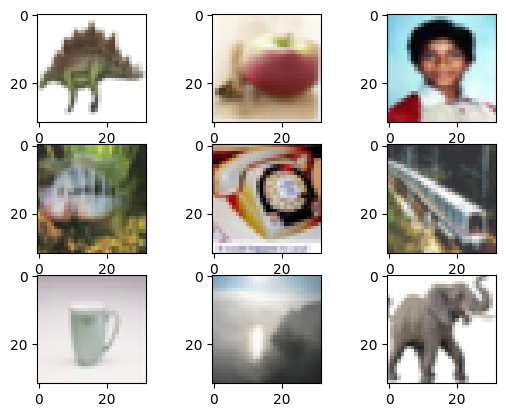

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()


In [6]:
print(x_test[0,10,10])
print(y_test[0]) #<-- Нужно преобразовать в OneHot Encoding

[241 239 242]
[49]


### 1.3. Произведите нормализацию данных:

In [7]:
# Ваш код #
from tensorflow import keras

x_train_n = x_train / 255
x_test_n = x_test / 255

y_train_n = keras.utils.to_categorical(y_train, 100) # Перобразование в OneHot Encoding
y_test_n = keras.utils.to_categorical(y_test, 100) # Перобразование в OneHot Encoding

print(x_train_n.shape)
print(x_test_n.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
print(x_test_n[0,10,10])
print(y_test_n[0])


[0.94509804 0.9372549  0.94901961]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

In [9]:
model_1 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100,  activation='softmax')
])

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 909,092 (3.47 MB)

 Trainable params: 909,092 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучите созданную модель

In [13]:
EPOCHS = 10
BATCH = 125


In [14]:

# Ваш код #
model_1_history = model_1.fit(x_train_n, y_train_n,
                              batch_size=BATCH,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=(x_test_n, y_test_n))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7992 - loss: 0.6929 - val_accuracy: 0.3811 - val_loss: 3.4261
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8269 - loss: 0.5889 - val_accuracy: 0.3773 - val_loss: 3.7123
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8558 - loss: 0.4831 - val_accuracy: 0.3738 - val_loss: 4.0250
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8781 - loss: 0.3979 - val_accuracy: 0.3641 - val_loss: 4.3323
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8924 - loss: 0.3448 - val_accuracy: 0.3656 - val_loss: 4.5524
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9178 - loss: 0.2742 - val_accuracy: 0.3695 - val_loss: 4.8564
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9247 - loss: 0.2481 - val_accuracy: 0.3575 - val_loss: 5.3565
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9311 - loss: 0.2240 - val_accuracy: 0.

### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [15]:
model_2 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 910,500 (3.47 MB)

 Trainable params: 909,796 (3.47 MB)

 Non-trainable params: 704 (2.75 KB)

Обучите созданную модель

In [17]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [18]:
model_2_history = model_2.fit(x_train_n, y_train_n,
                              batch_size=BATCH,
                              epochs=5,
                              verbose=1,
                              validation_data=(x_test_n, y_test_n))

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1787 - loss: 3.6004 - val_accuracy: 0.1190 - val_loss: 4.1482
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4364 - loss: 2.2095 - val_accuracy: 0.3722 - val_loss: 2.5018
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5717 - loss: 1.6259 - val_accuracy: 0.3988 - val_loss: 2.3758
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 1.1212 - val_accuracy: 0.4176 - val_loss: 2.4468
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8275 - loss: 0.6766 - val_accuracy: 0.4149 - val_loss: 2.6758


### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [19]:
model_3 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 909,092 (3.47 MB)

 Trainable params: 909,092 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:

model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучите созданную модель

In [21]:
model_3_history = model_3.fit(x_train_n, y_train_n,
                              batch_size=BATCH,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=(x_test_n, y_test_n))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0245 - loss: 4.4783 - val_accuracy: 0.1293 - val_loss: 3.8613
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0950 - loss: 3.9028 - val_accuracy: 0.1874 - val_loss: 3.4654
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1480 - loss: 3.5944 - val_accuracy: 0.2415 - val_loss: 3.2045
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1769 - loss: 3.4038 - val_accuracy: 0.2653 - val_loss: 3.0546
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1971 - loss: 3.2920 - val_accuracy: 0.2926 - val_loss: 2.8988
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2205 - loss: 3.1814 - val_accuracy: 0.3098 - val_loss: 2.8134
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2344 - loss: 3.1030 - val_accuracy: 0.3151 - val_loss: 2.7855
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2466 - loss: 3.0320 - val_accuracy: 0.

Использование Dropout показывает неплохие результаты по валидационной точности, однако по обучающей точности модель результаты очень низкие. За 15 эпох модель набрала лишь ~33%. Возможно архитетруа оказалась слишко глубокой для такой задачи или же недостаточно количество эпох. Лучше не использовать Dropout без дополнительных средств (например без BatchNormalization).

### 1.7. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [22]:
model_4 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 910,500 (3.47 MB)

 Trainable params: 909,796 (3.47 MB)

 Non-trainable params: 704 (2.75 KB)

In [23]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучите созданную модель

In [24]:
model_4_history = model_4.fit(x_train_n, y_train_n,
                              batch_size=BATCH,
                              epochs=EPOCHS,
                              verbose=1,
                              validation_data=(x_test_n, y_test_n))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.0681 - loss: 4.4873 - val_accuracy: 0.0523 - val_loss: 4.5446
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2016 - loss: 3.3374 - val_accuracy: 0.2591 - val_loss: 2.9789
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2746 - loss: 2.9273 - val_accuracy: 0.3103 - val_loss: 2.7543
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3218 - loss: 2.6996 - val_accuracy: 0.3433 - val_loss: 2.6026
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3483 - loss: 2.5609 - val_accuracy: 0.3888 - val_loss: 2.3788
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3744 - loss: 2.4262 - val_accuracy: 0.4149 - val_loss: 2.2422
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3956 - loss: 2.3457 - val_accuracy: 0.4456 - val_loss: 2.1044
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4079 - loss: 2.2627 - val_accuracy: 

### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

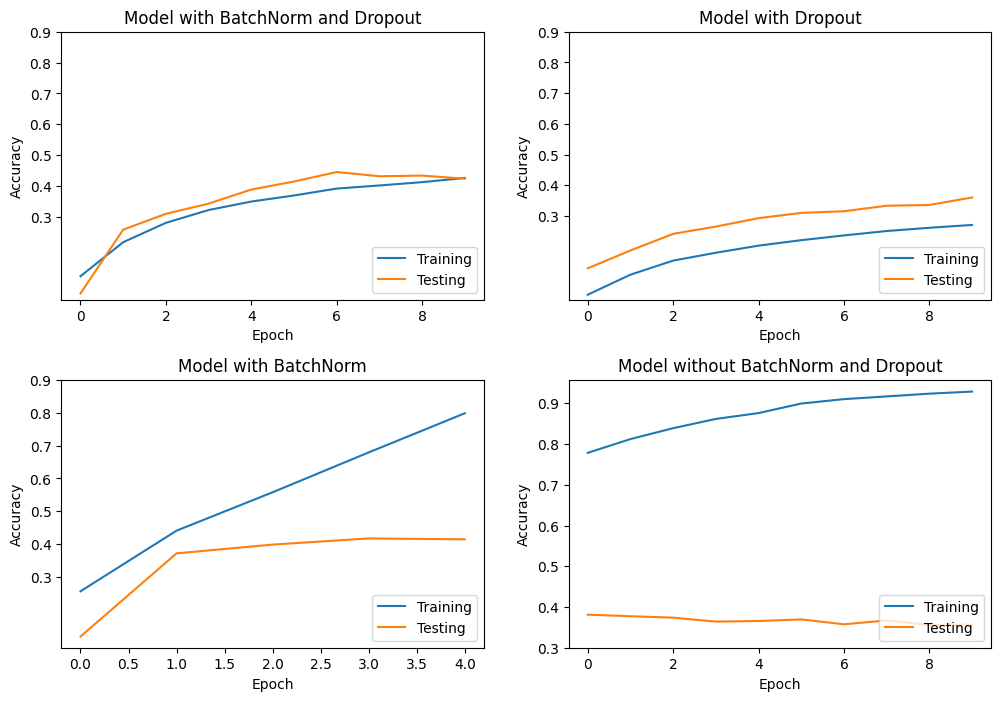

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_4_history.history['accuracy'], label='Training')
plt.plot(model_4_history.history['val_accuracy'], label='Testing')
plt.title('Model with BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.subplot(2, 2, 2)
plt.plot(model_3_history.history['accuracy'], label='Training')
plt.plot(model_3_history.history['val_accuracy'], label='Testing')
plt.title('Model with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.subplot(2, 2, 3)
plt.plot(model_2_history.history['accuracy'], label='Training')
plt.plot(model_2_history.history['val_accuracy'], label='Testing')
plt.title('Model with BatchNorm')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.subplot(2, 2, 4)
plt.plot(model_1_history.history['accuracy'], label='Training')
plt.plot(model_1_history.history['val_accuracy'], label='Testing')
plt.title('Model without BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.subplots_adjust(hspace=0.3)

plt.show()

Ваши выводы
Лучший результат показала модель, где использовалось BatchNormalization и Dropout. У нее лучшие результаты по валидационной точности среди всех моделей, она не оказалась подвержена переобучению (в отличии от модели без BatchNorm и Dropout, модели с BatchNorm). У нее наблюдается высокое схождение обучающей и валидационной точности.

Ваш итог
Лучше всего использовать одновременно и BatchNorm и Dropout, чтобы добиться более быстрого обучения и более высоких показателей точнсоти по валидационной выборке. Однако стоит отметить, что следует также использовать чекпоинты и EarlyStopping, чтобы исключить возможность переобучения модели. Также стоит тщательно подбирать количество эпох обучения и по возможности регулировать скорость обучения (чего я увы не делал и в результате две из четырех моделей переобучились).


### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [26]:
def visualize_act_map(model, img_input):
    """
    Универсальная функция для визуализации активаций сверточных слоев.

    Args:
        model: Модель Keras (Sequential или Functional)
        img_input: Входное изображение или батч изображений
    """
    # Убеждаемся, что входные данные представлены в правильной размерности
    if len(np.array(img_input).shape) == 3:
        img_input = np.expand_dims(img_input, axis=0)

    # Конвертируем входные данные в тензор
    input_tensor = tf.convert_to_tensor(img_input)

    # Обрабатываем входные данные по слоям, не создавая новую модель
    x = input_tensor

    # Находим и визуализируем карты активации сверточных слоев
    for layer in model.layers:
        # Применяем слой напрямую
        x = layer(x)

        # Визуализируем, если это сверточный или пулинговый слой
        if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
            # Конвертируем активации в numpy-массив
            activation = x.numpy()

            n_features = activation.shape[-1]
            print(f"Визуализация слоя: {layer.name}, форма: {activation.shape}")

            # Настраиваем размеры сетки
            cols = min(16, n_features)
            rows = (n_features + cols - 1) // cols

            # Создаем фигуру
            plt.figure(figsize=(cols * 1.5, rows * 1.5))
            plt.suptitle(f'Активации слоя {layer.name}', fontsize=16)

            # Отображаем каждую карту признаков
            for j in range(n_features):
                plt.subplot(rows, cols, j + 1)

                # Получаем карту признаков
                feature_map = activation[0, :, :, j]

                # Нормализуем для лучшей визуализации
                mean = feature_map.mean()
                std = feature_map.std()

                if std > 0:
                    feature_map = (feature_map - mean) / std

                # Ограничиваем значения для лучшей визуализации
                feature_map = np.clip(feature_map, -3, 3)

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{j}')
                plt.axis('off')

            plt.tight_layout(rect=[0, 0, 1, 0.95])
            plt.show()


Визуализация слоя: conv2d_9, форма: (1, 32, 32, 32)


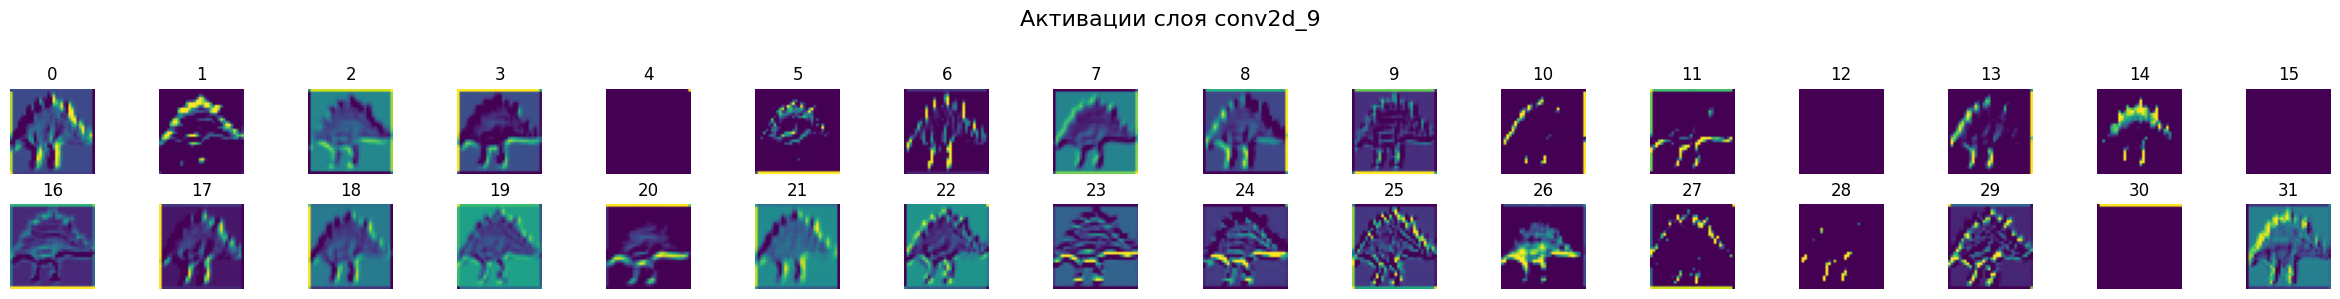

Визуализация слоя: max_pooling2d_6, форма: (1, 16, 16, 32)


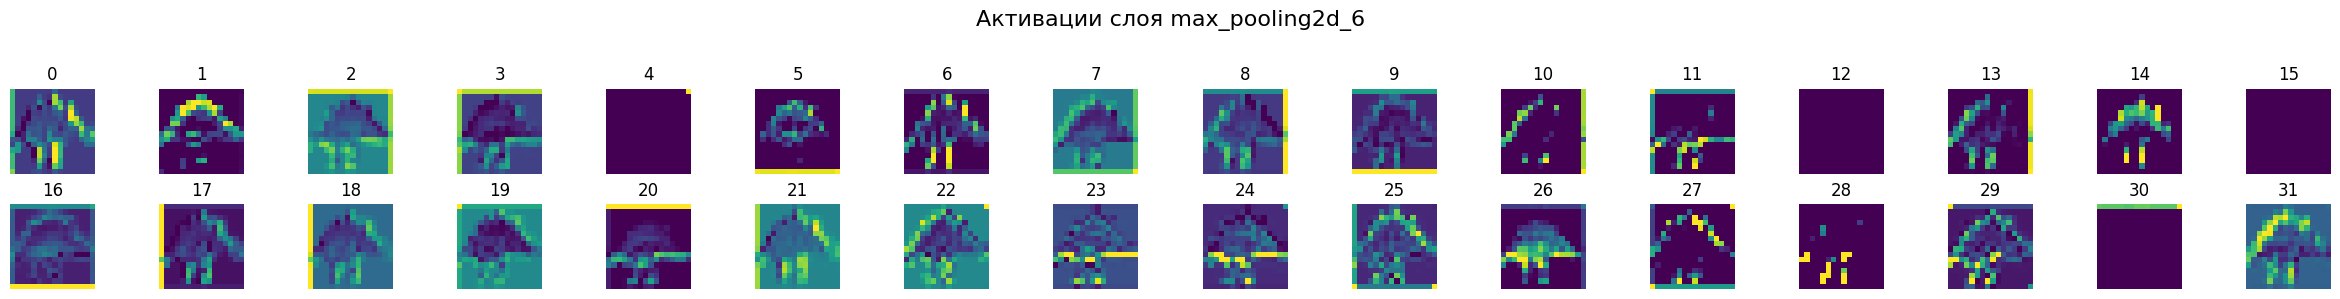

Визуализация слоя: conv2d_10, форма: (1, 14, 14, 64)


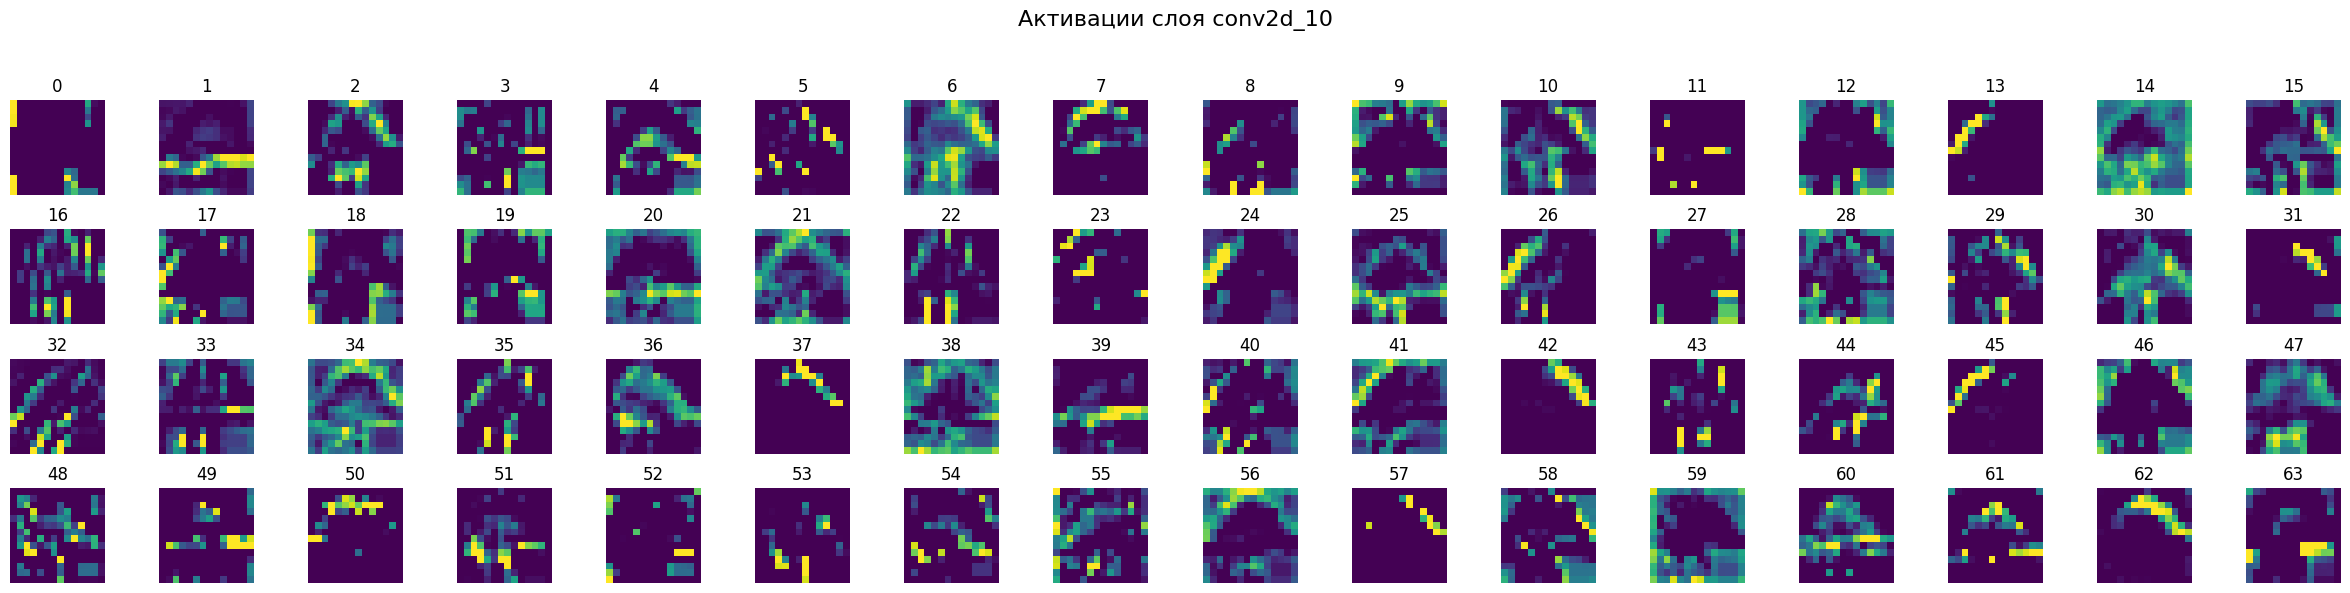

Визуализация слоя: max_pooling2d_7, форма: (1, 7, 7, 64)


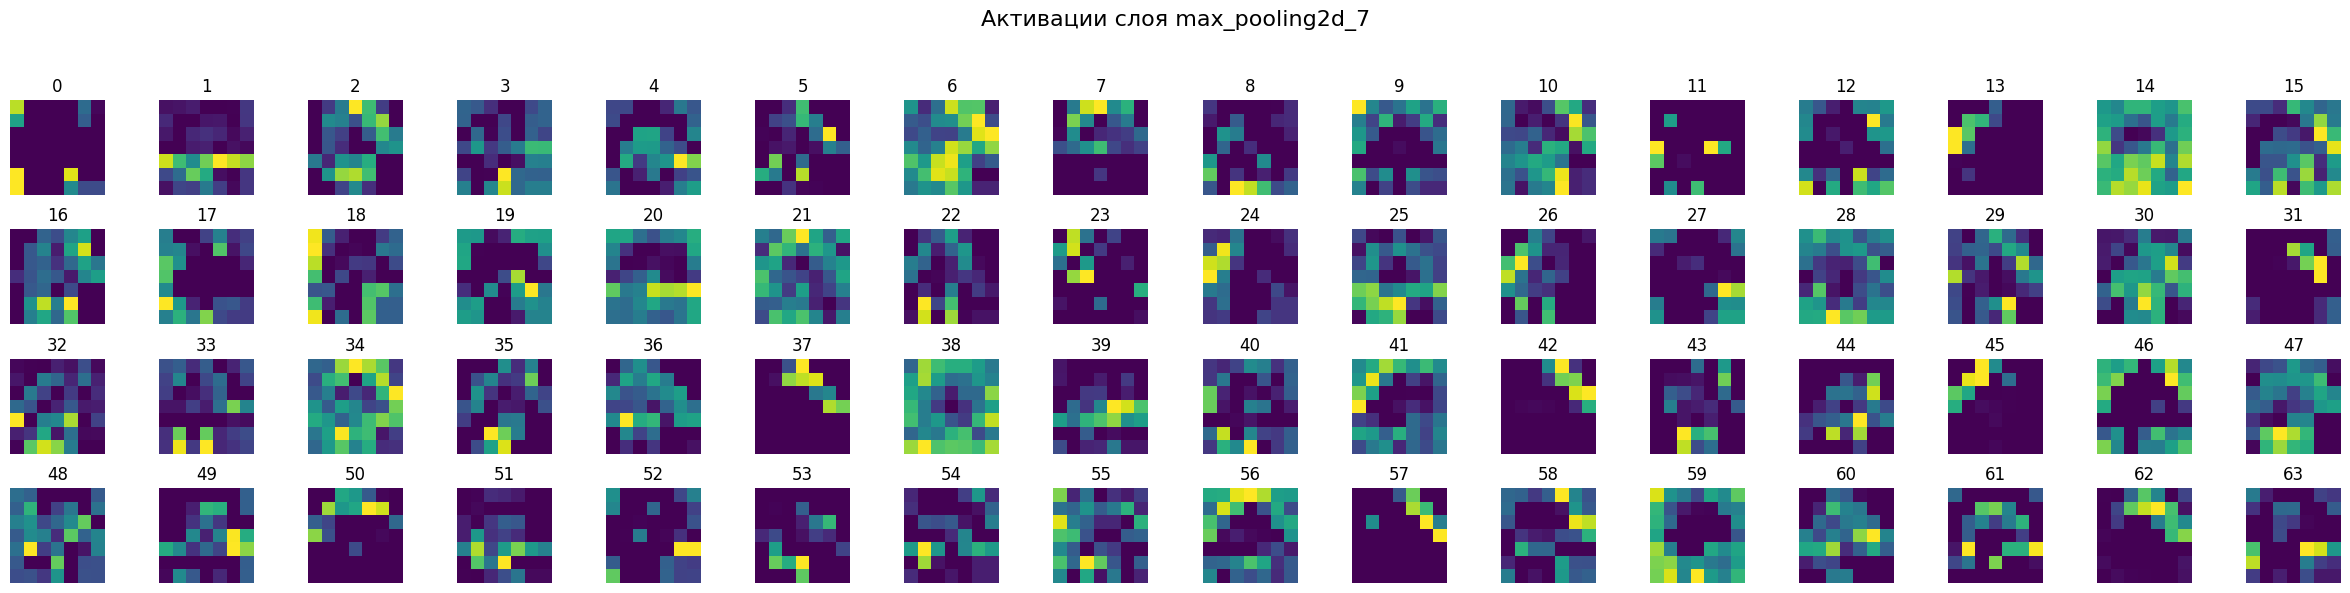

Визуализация слоя: conv2d_11, форма: (1, 7, 7, 128)


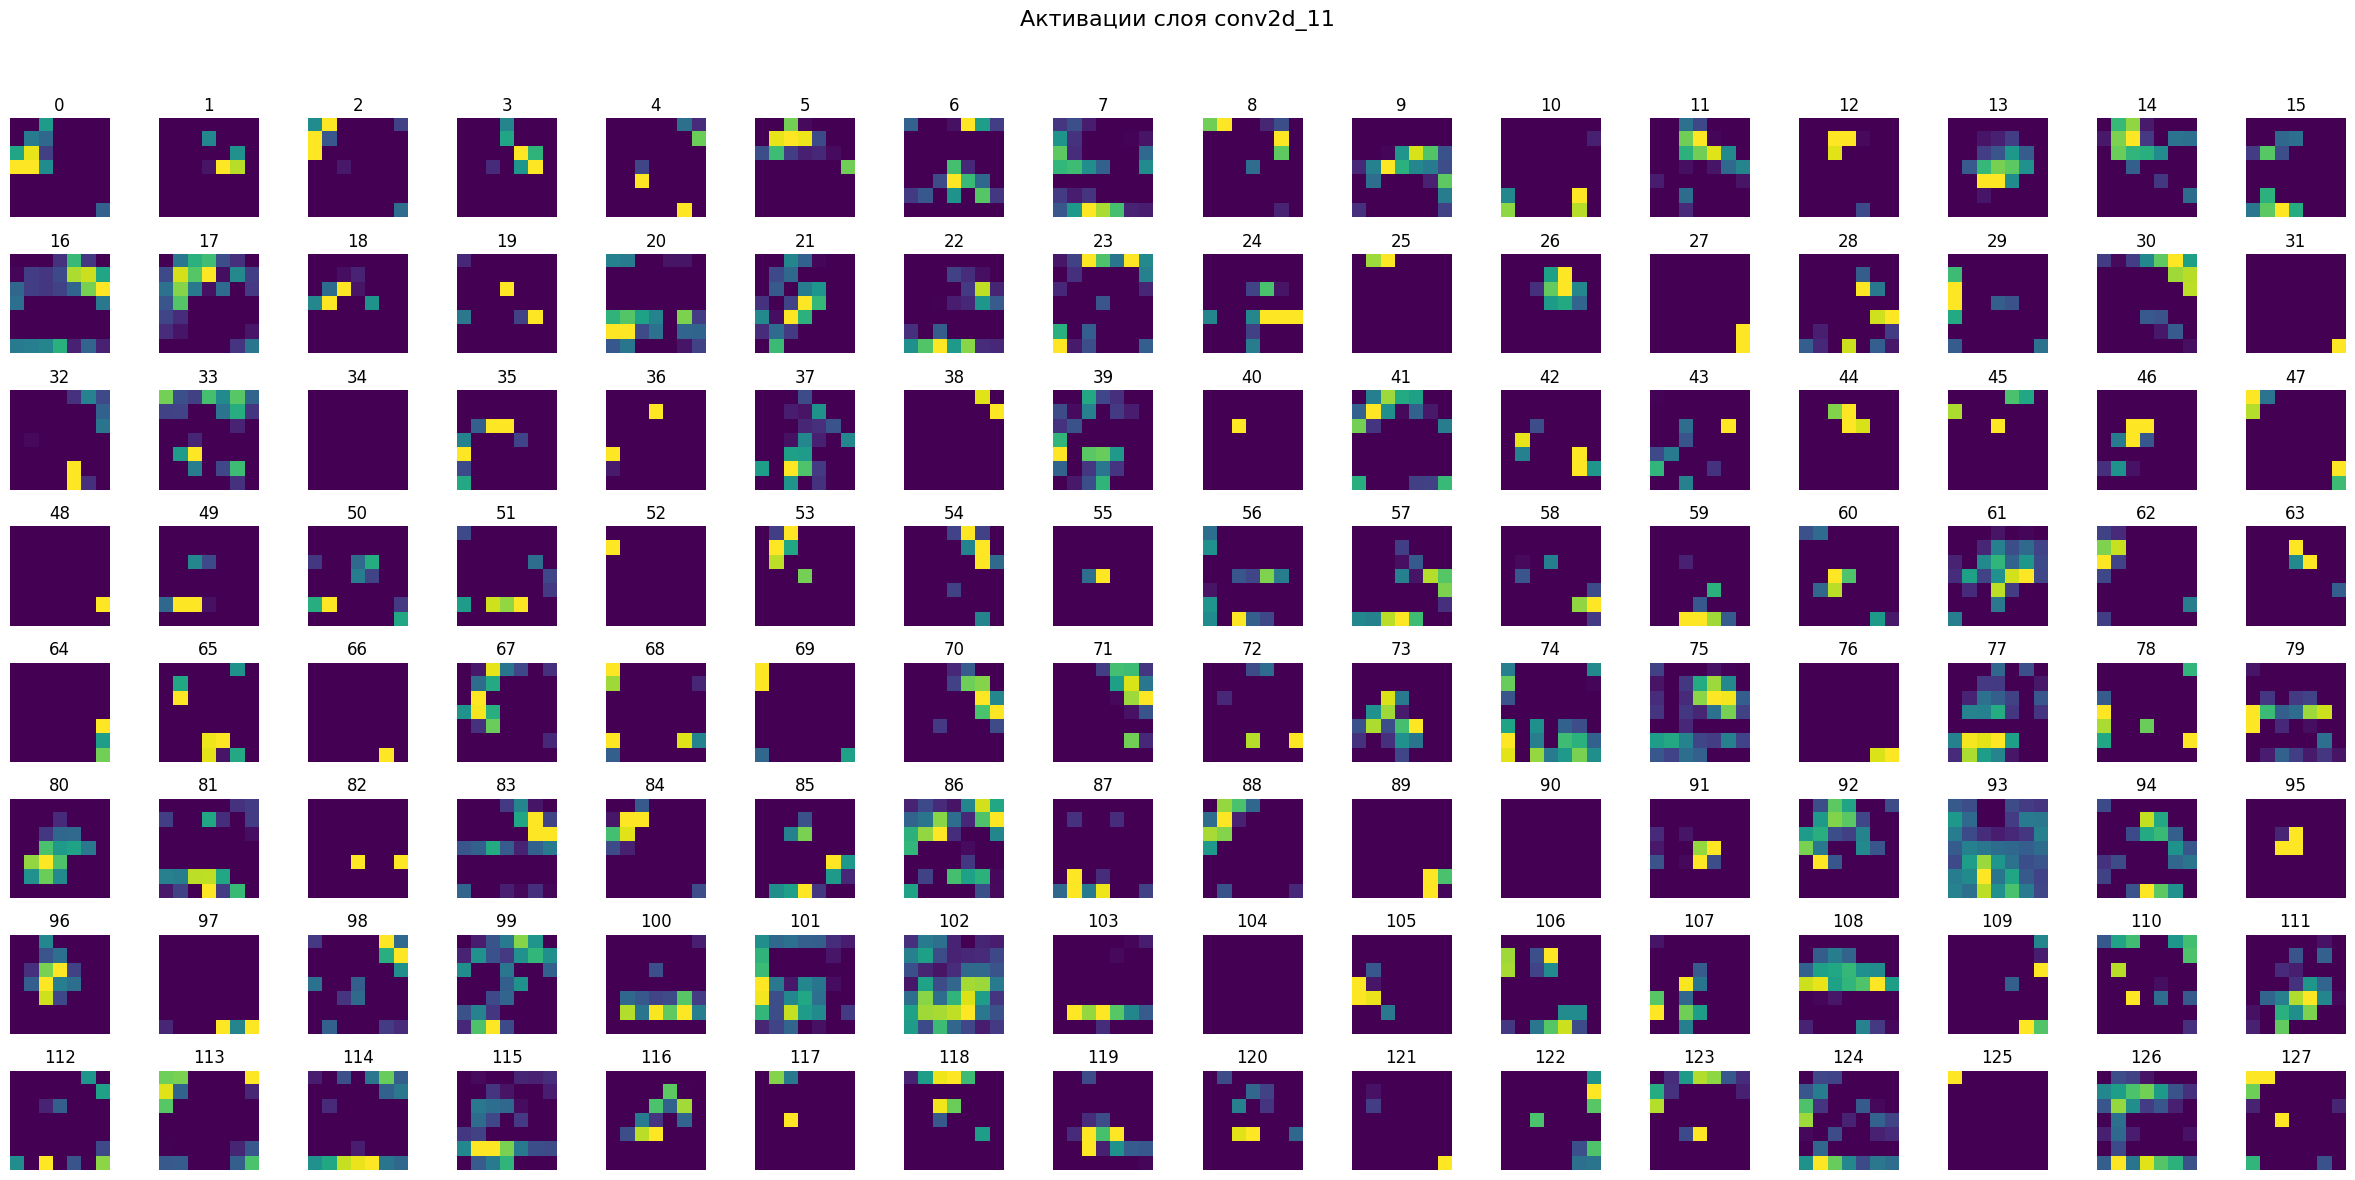

In [27]:

# Ваш код #
visualize_act_map(model_4, x_train_n[1]) # dinosaur

Визуализация слоя: conv2d_9, форма: (1, 32, 32, 32)


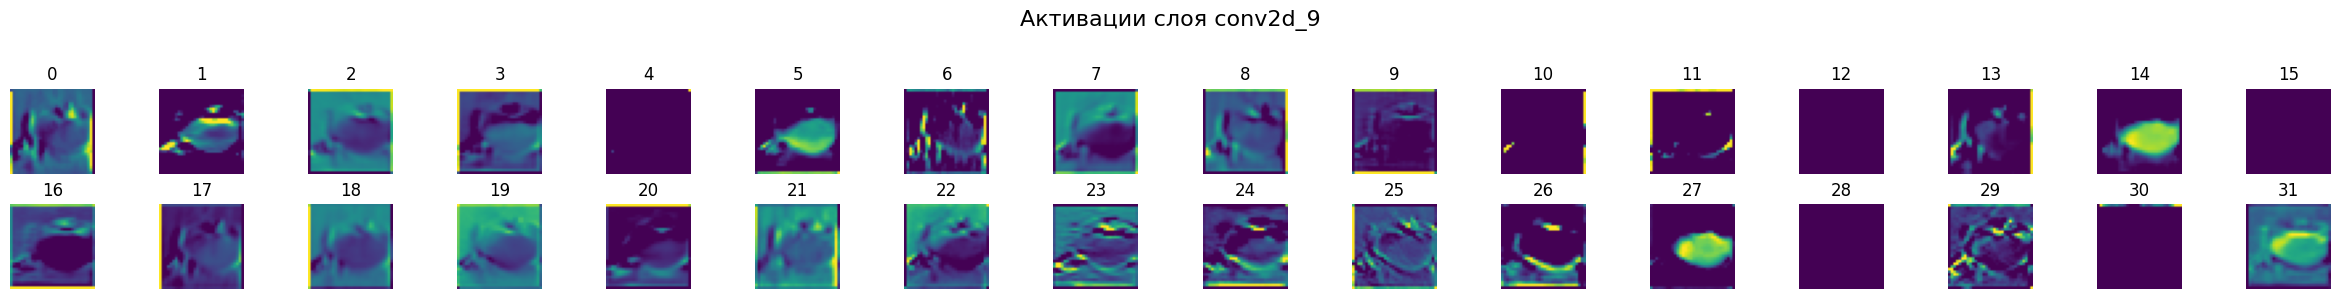

Визуализация слоя: max_pooling2d_6, форма: (1, 16, 16, 32)


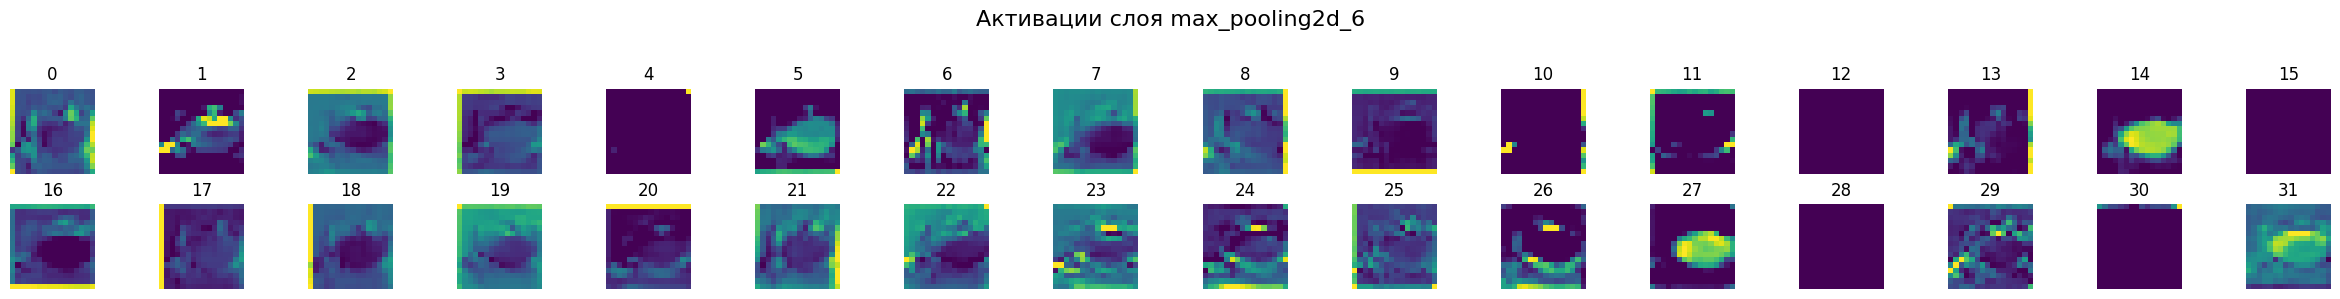

Визуализация слоя: conv2d_10, форма: (1, 14, 14, 64)


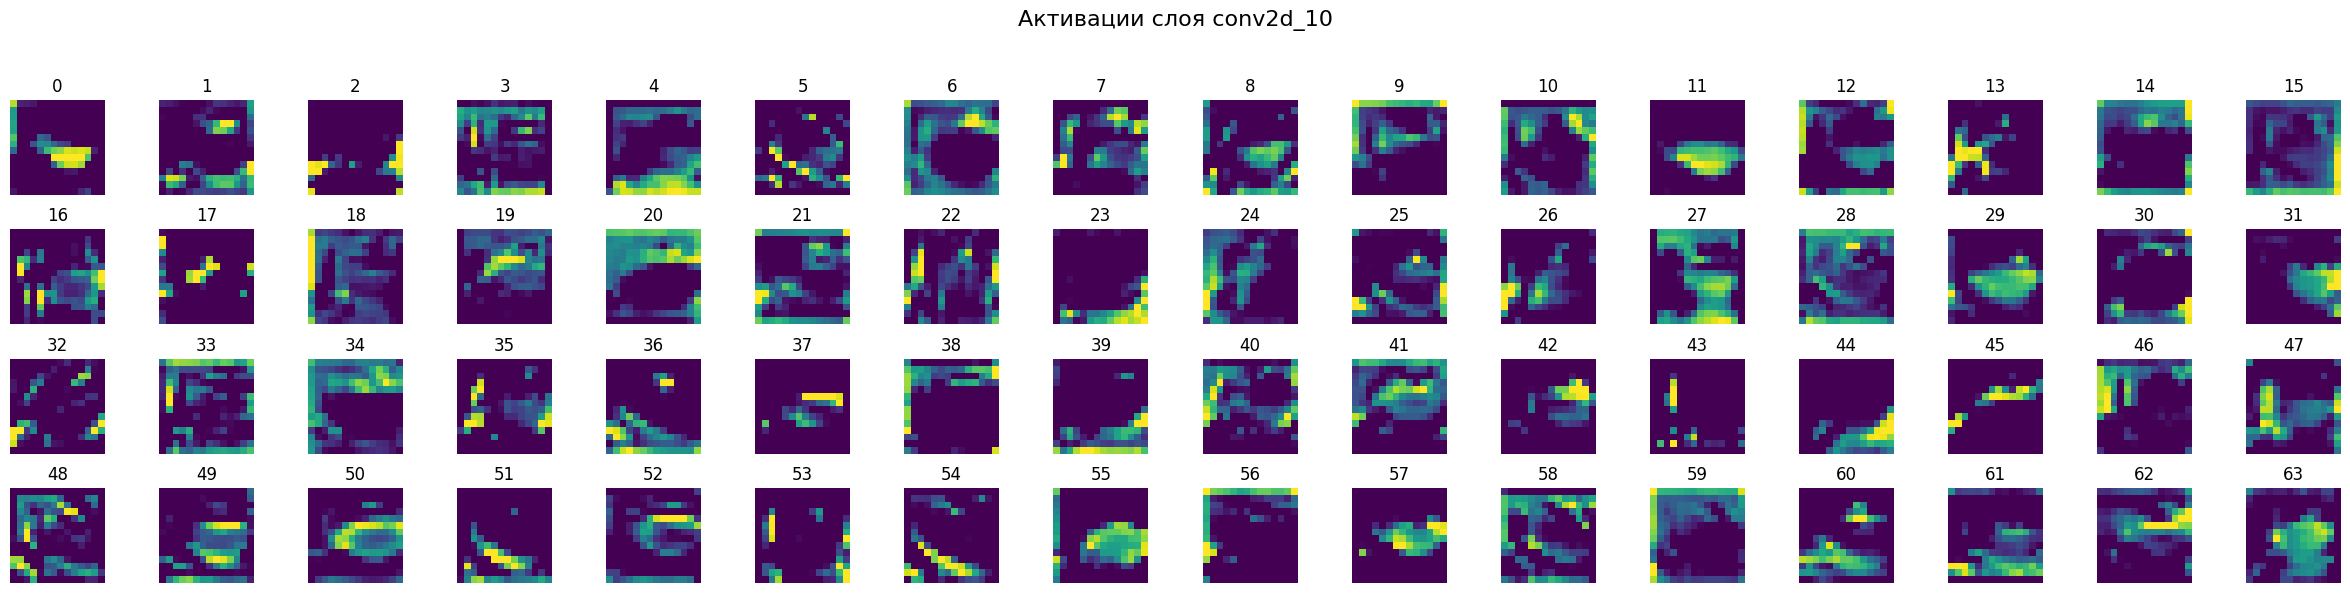

Визуализация слоя: max_pooling2d_7, форма: (1, 7, 7, 64)


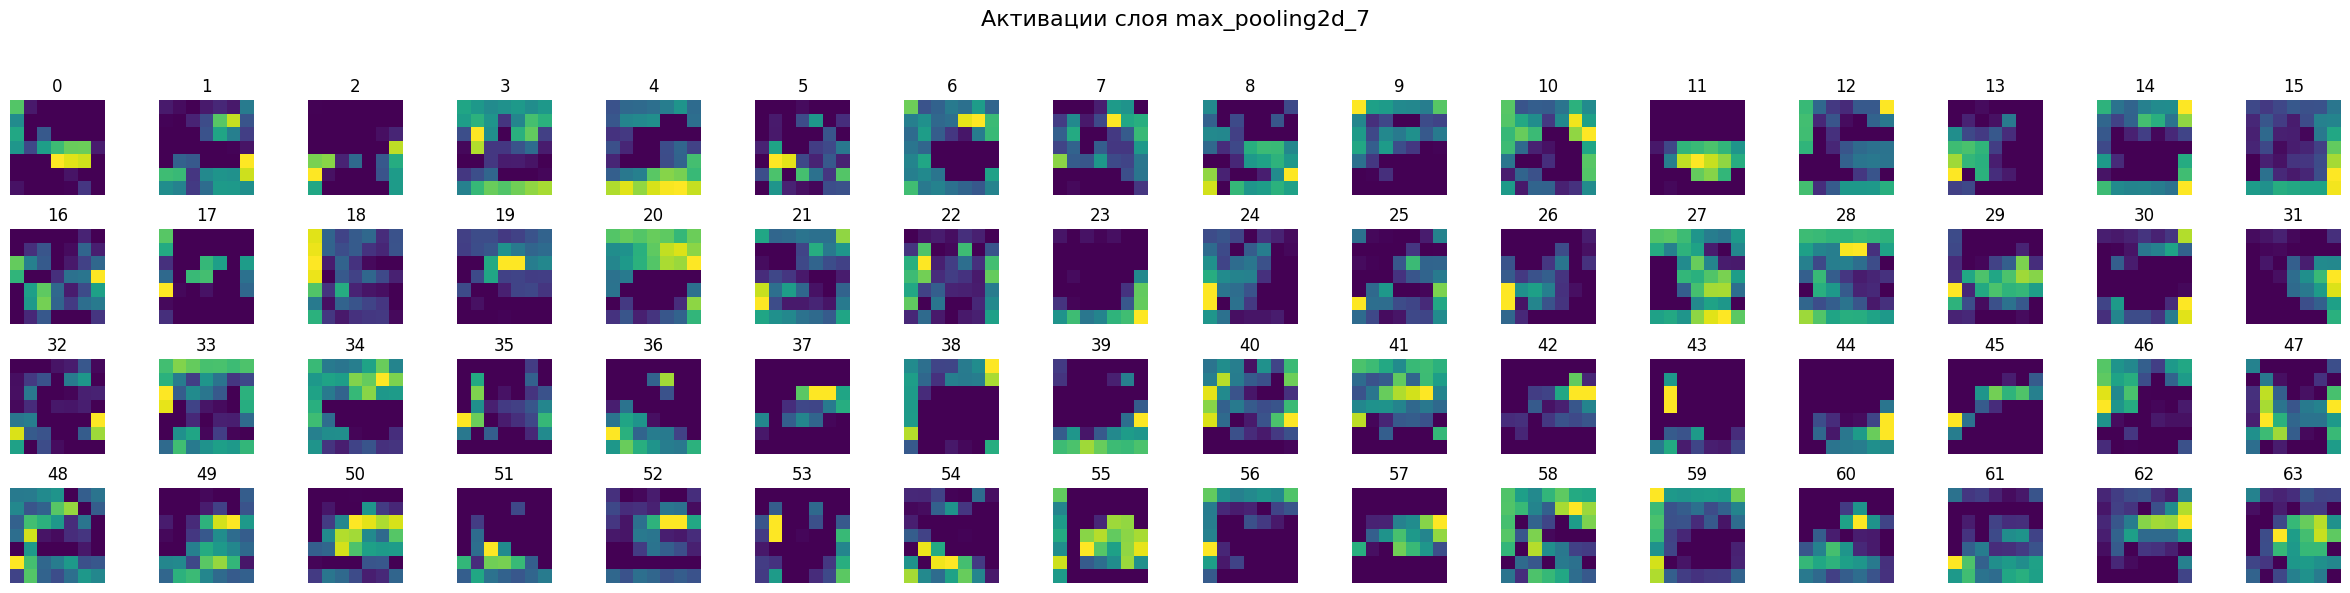

Визуализация слоя: conv2d_11, форма: (1, 7, 7, 128)


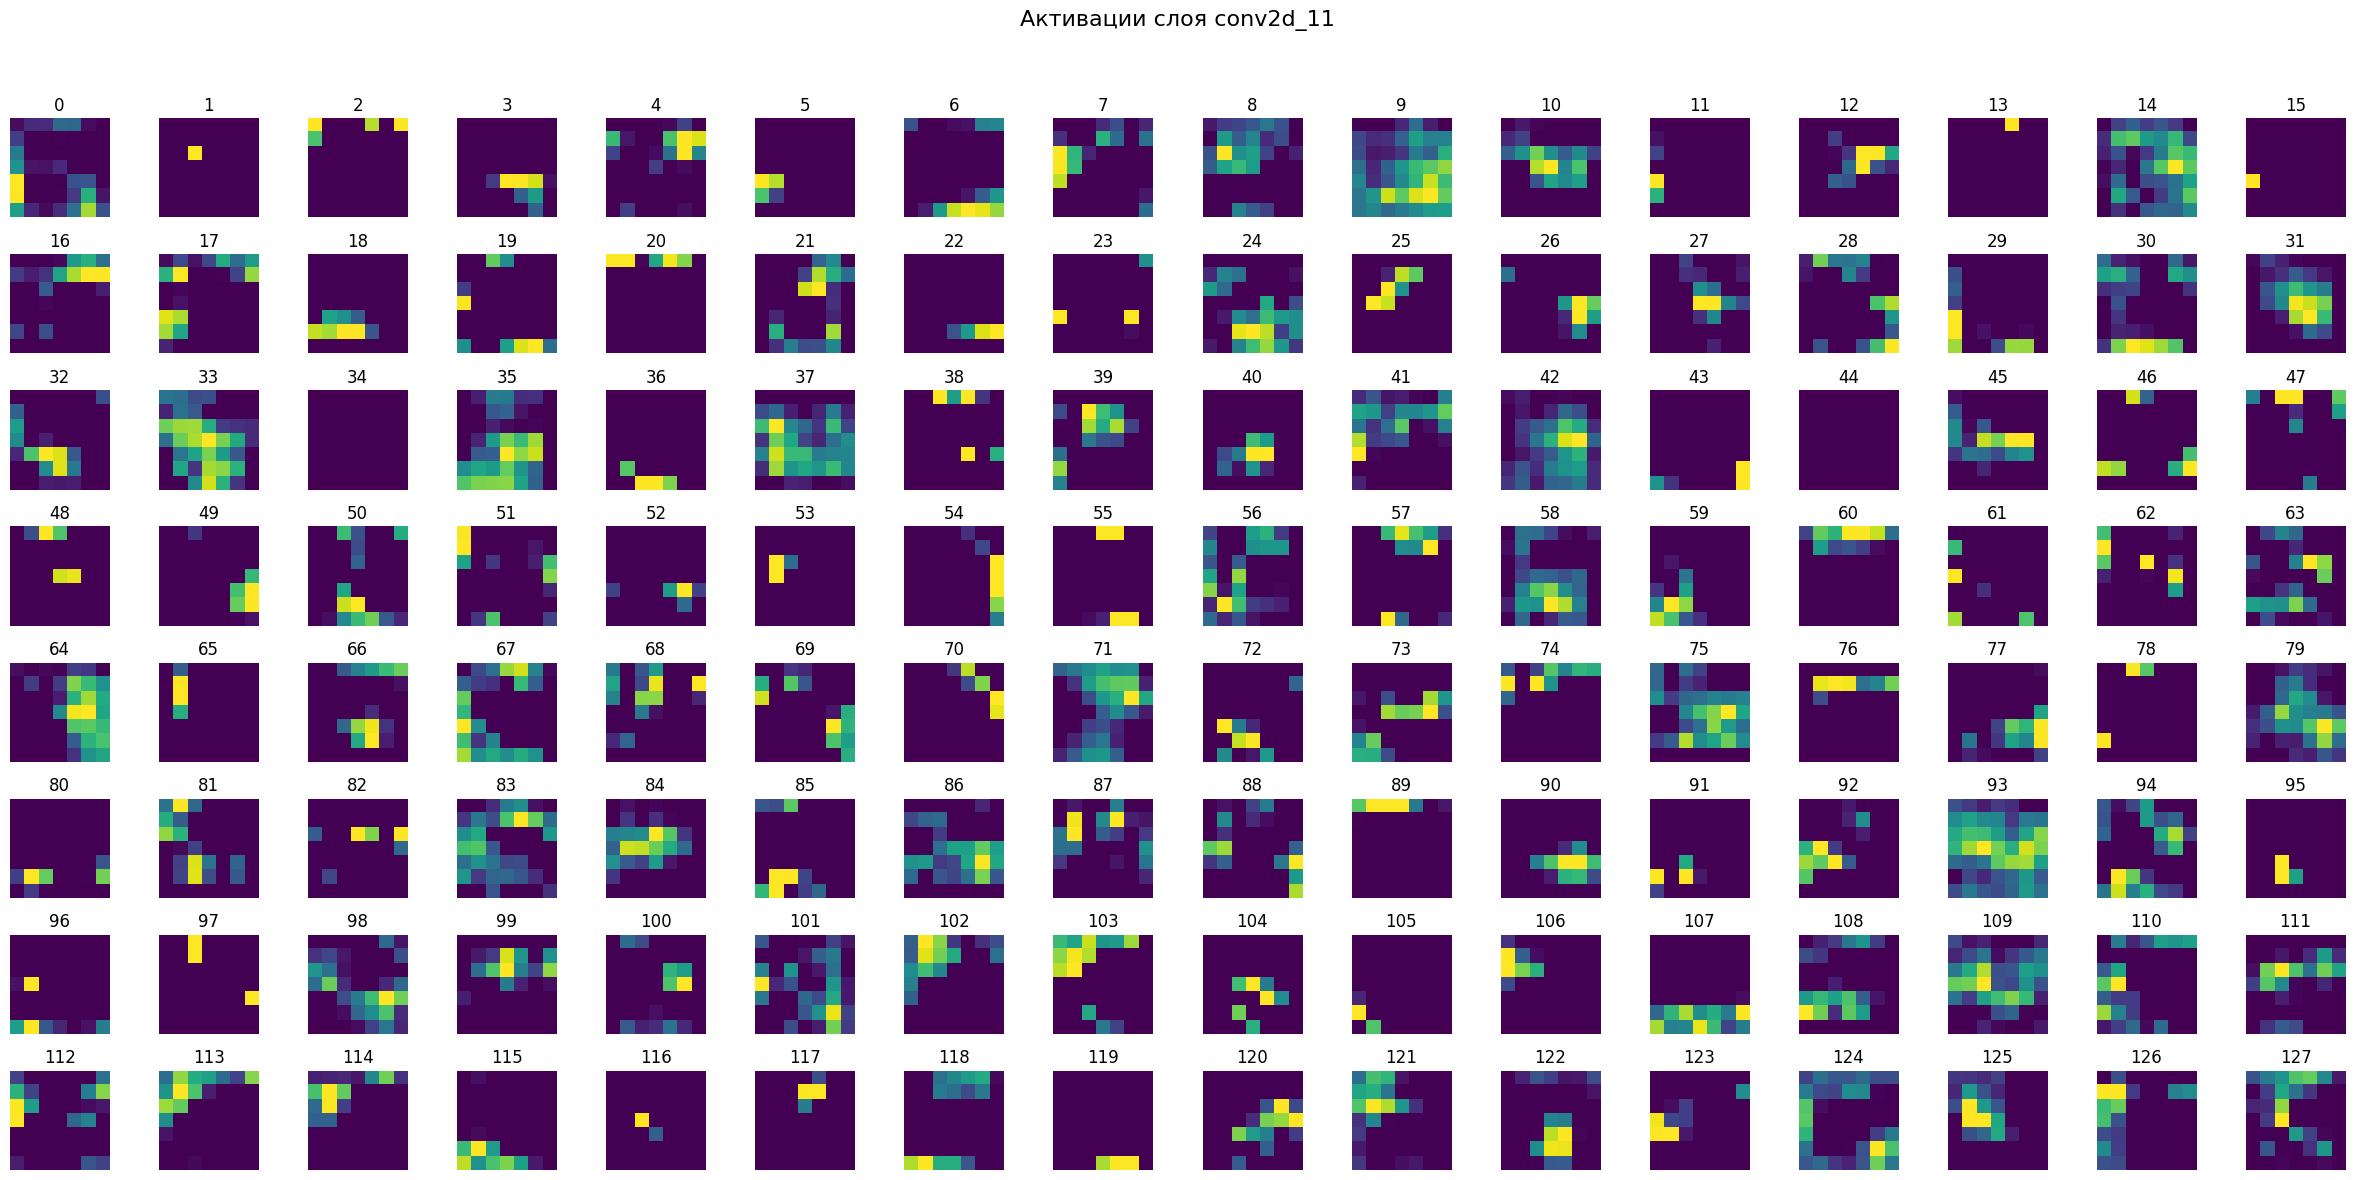

In [28]:


visualize_act_map(model_4, x_train_n[2]) # aquarium fish

Визуализация слоя: conv2d_9, форма: (1, 32, 32, 32)


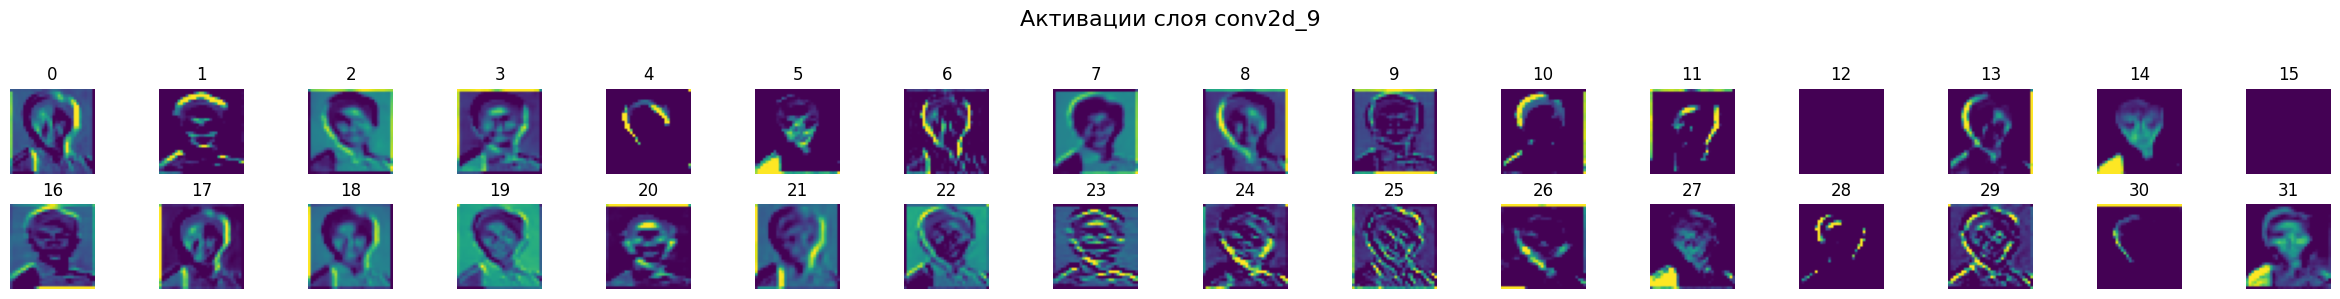

Визуализация слоя: max_pooling2d_6, форма: (1, 16, 16, 32)


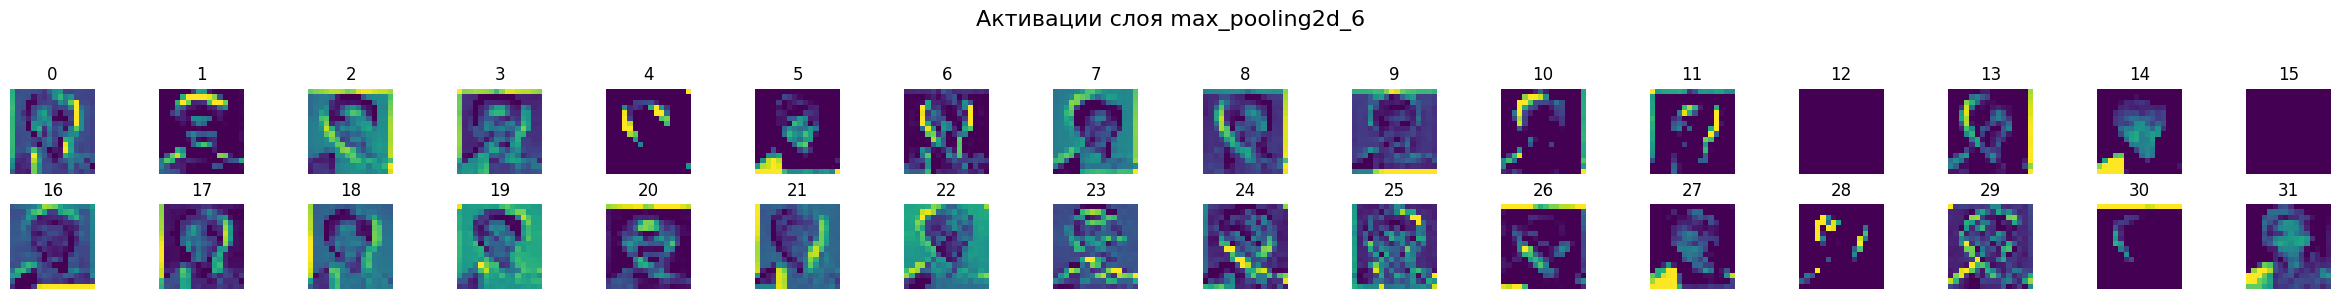

Визуализация слоя: conv2d_10, форма: (1, 14, 14, 64)


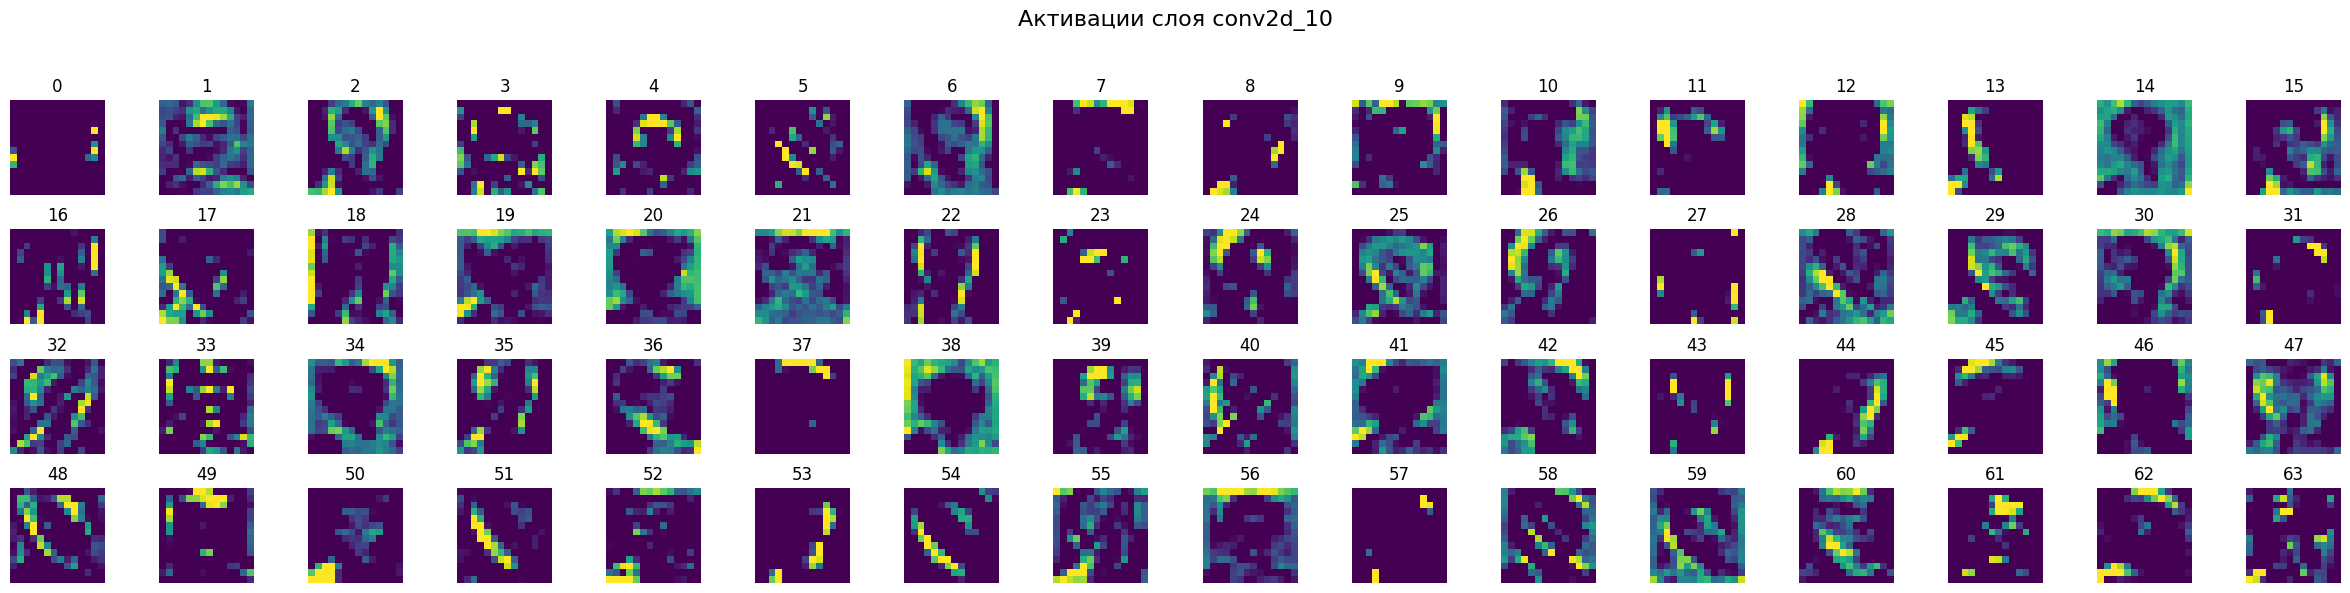

Визуализация слоя: max_pooling2d_7, форма: (1, 7, 7, 64)


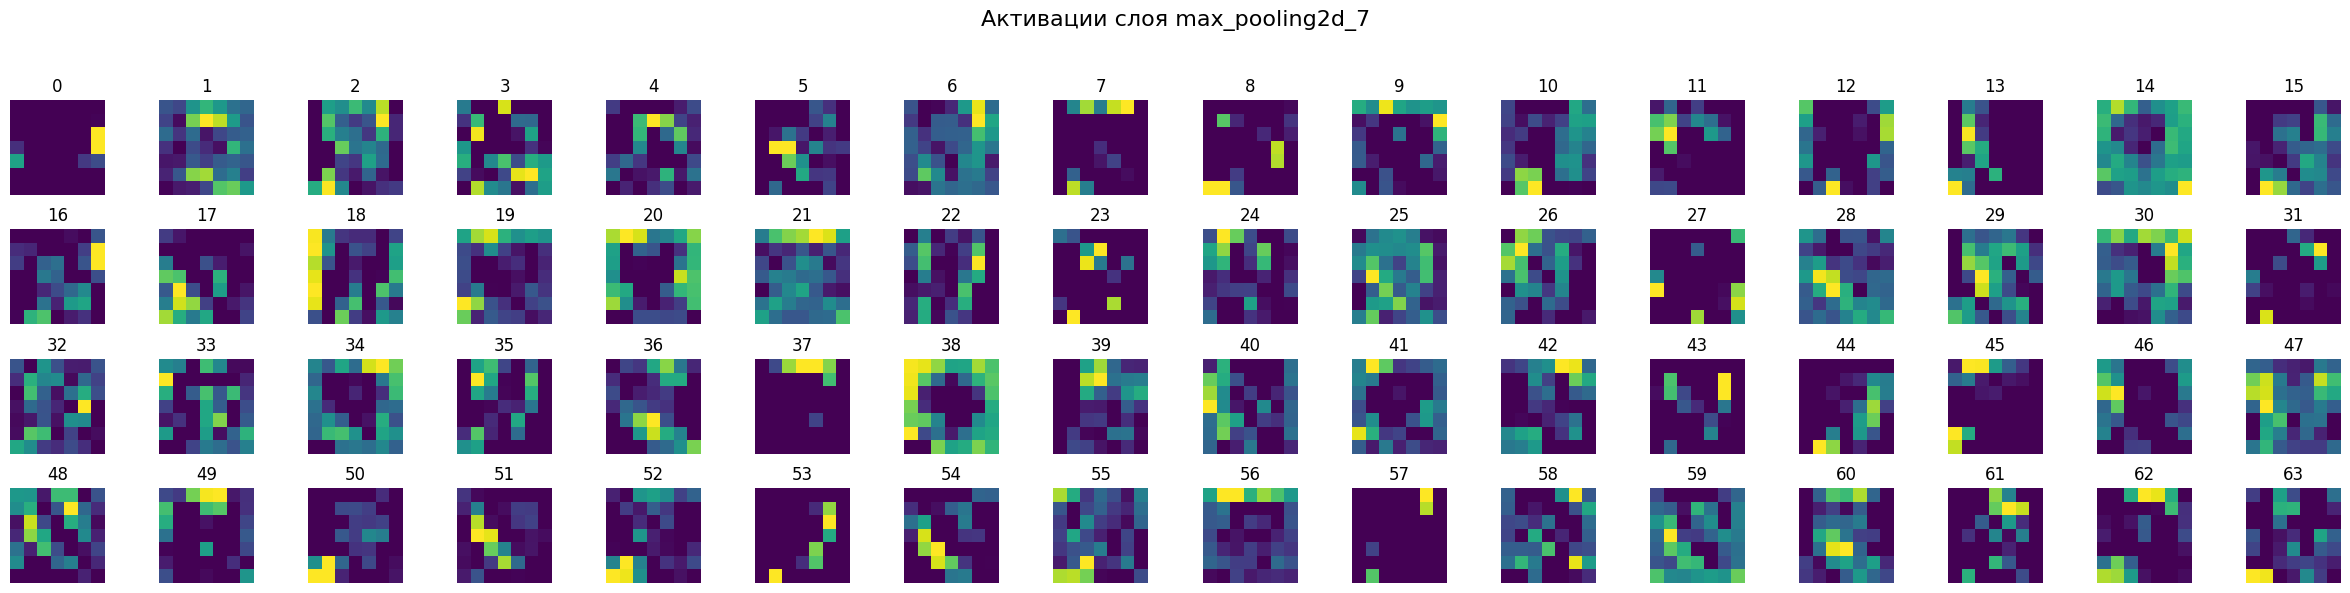

Визуализация слоя: conv2d_11, форма: (1, 7, 7, 128)


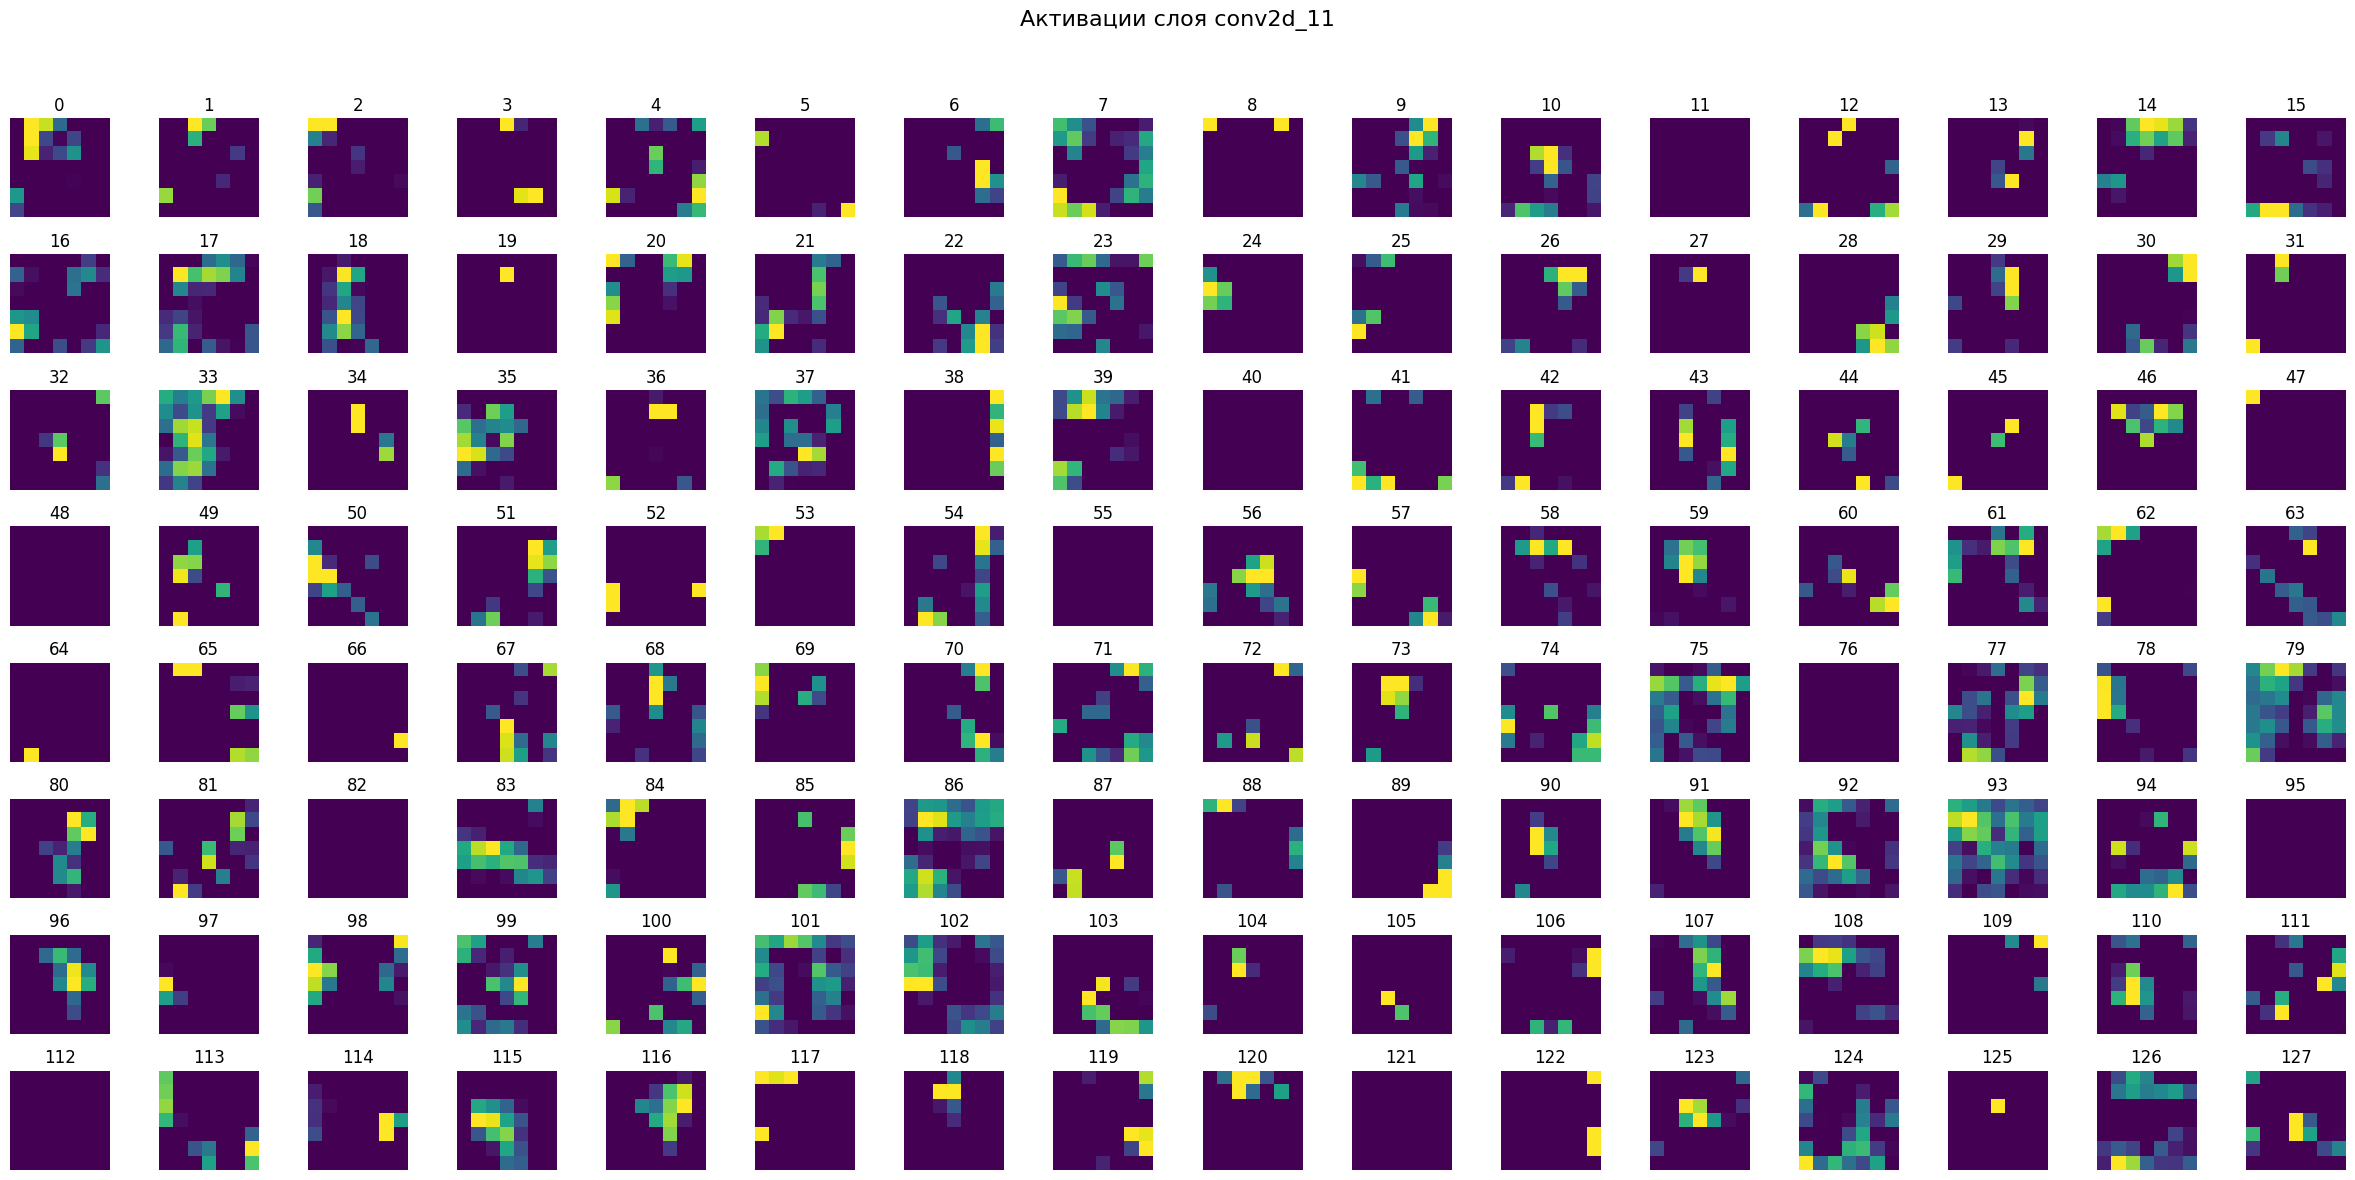

In [29]:
visualize_act_map(model_4, x_train_n[3]) # man

Визуализация слоя: conv2d_9, форма: (1, 32, 32, 32)


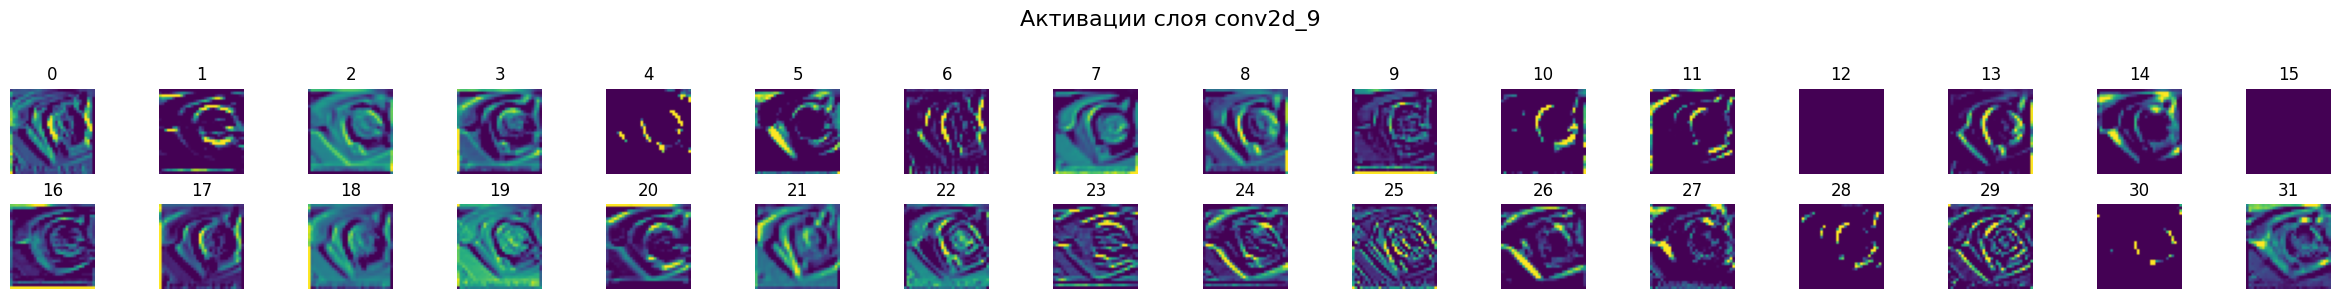

Визуализация слоя: max_pooling2d_6, форма: (1, 16, 16, 32)


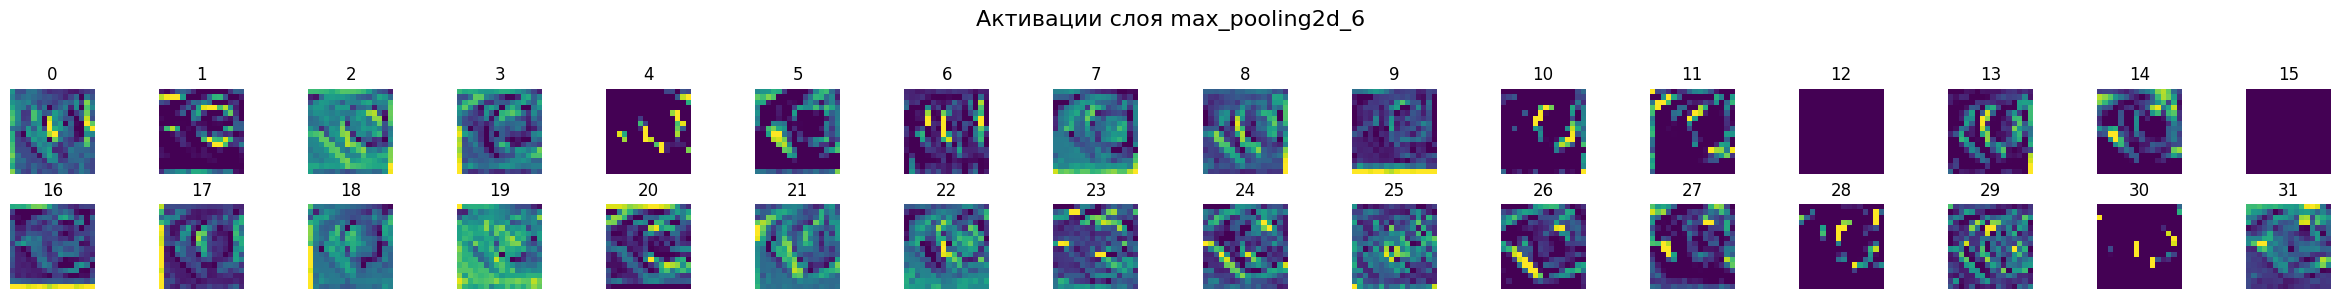

Визуализация слоя: conv2d_10, форма: (1, 14, 14, 64)


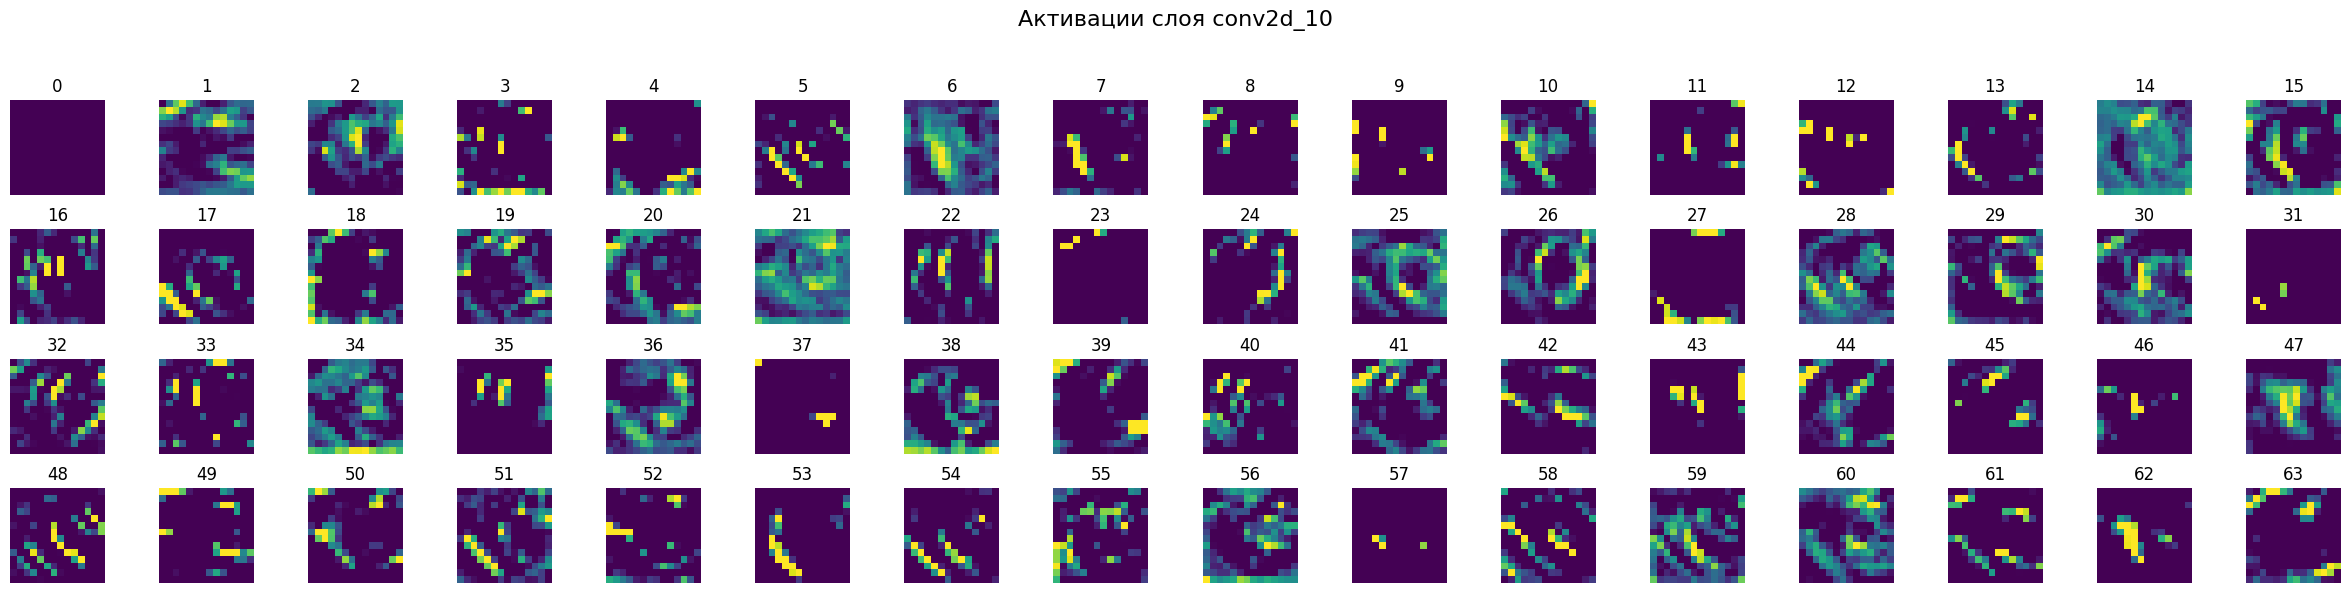

Визуализация слоя: max_pooling2d_7, форма: (1, 7, 7, 64)


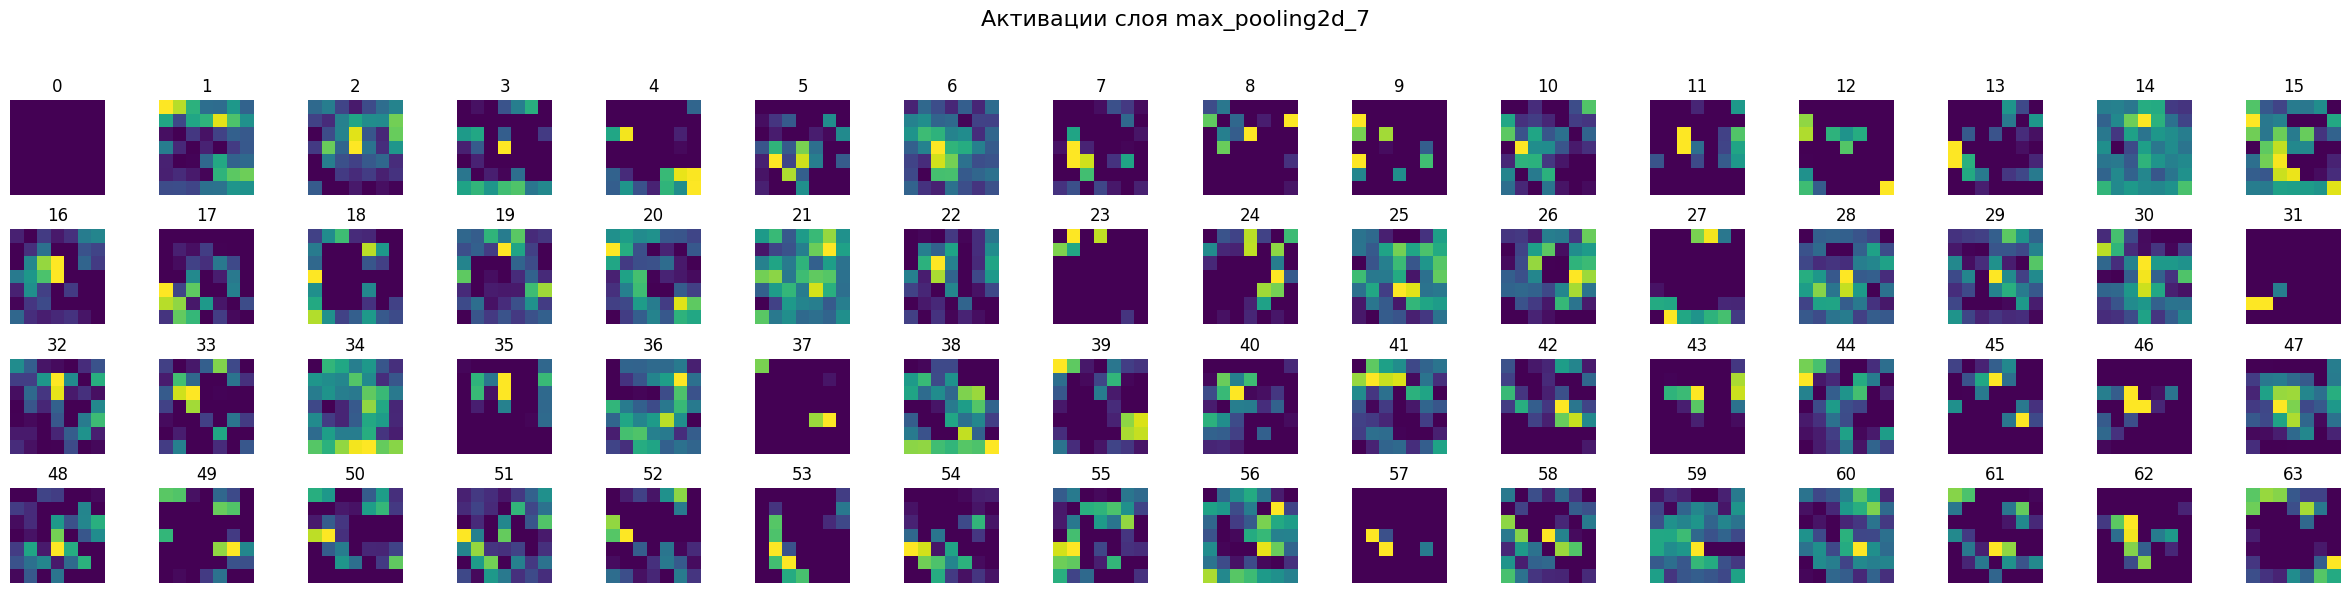

Визуализация слоя: conv2d_11, форма: (1, 7, 7, 128)


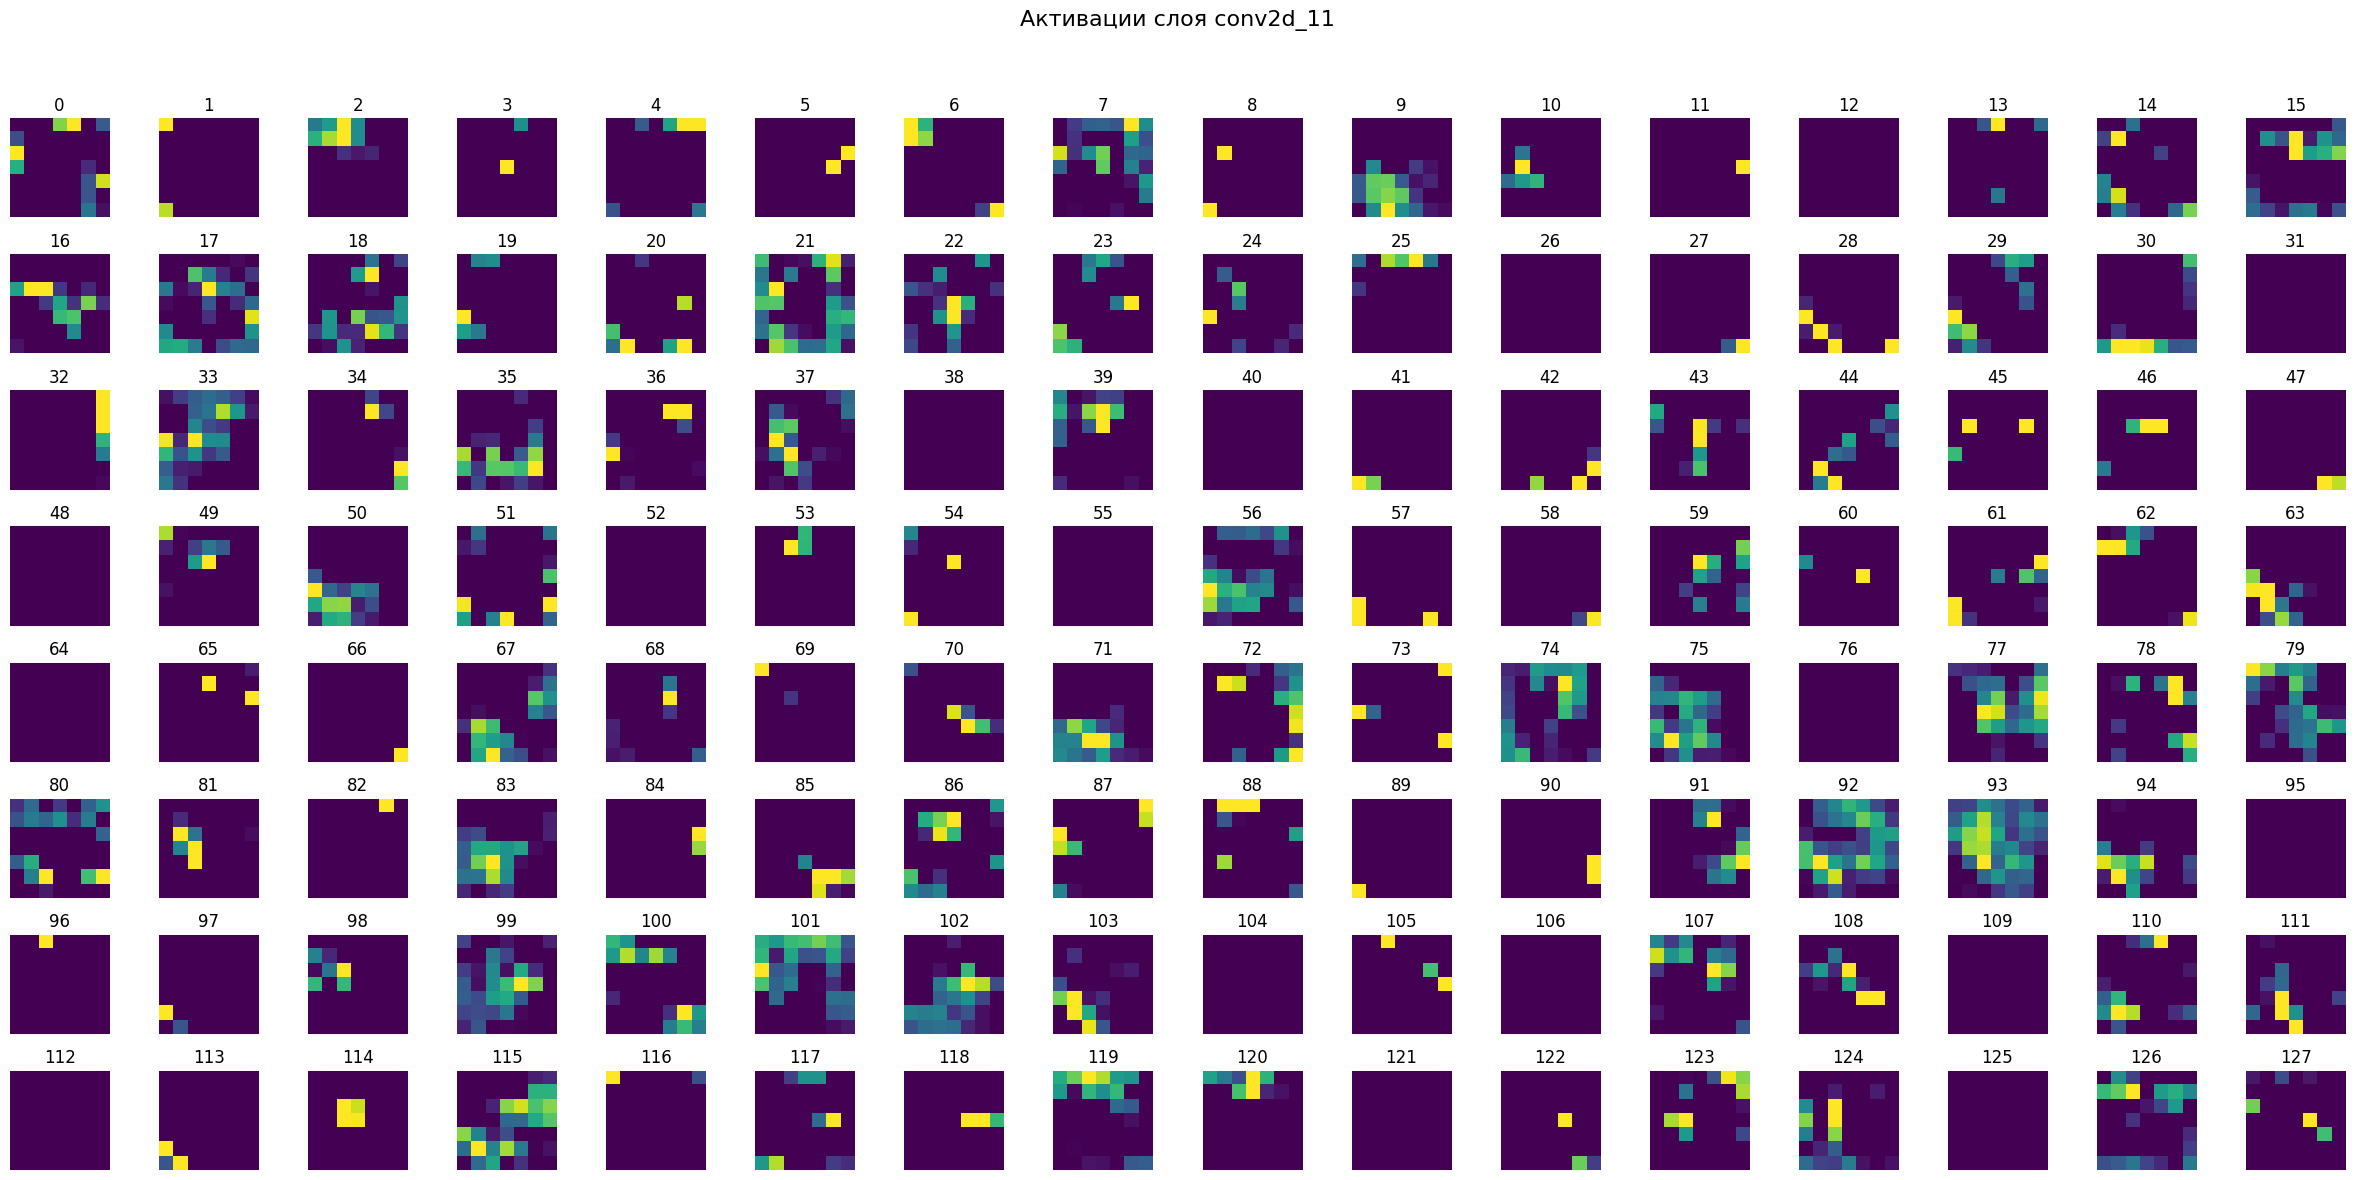

In [30]:
visualize_act_map(model_4, x_train_n[5]) # telephone

Визуализация слоя: conv2d_9, форма: (1, 32, 32, 32)


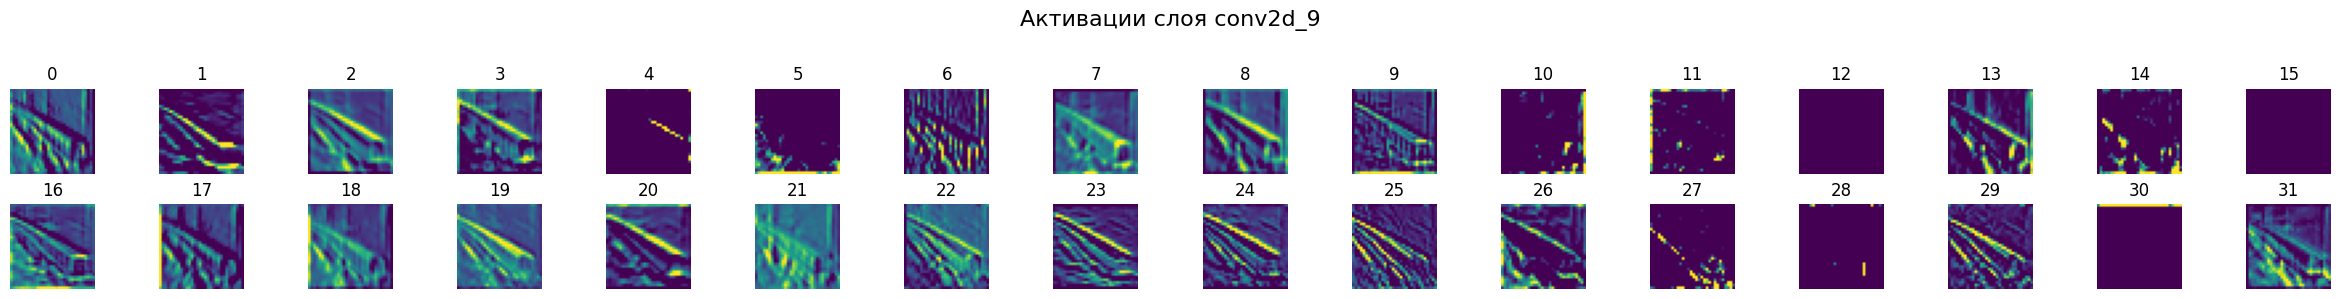

Визуализация слоя: max_pooling2d_6, форма: (1, 16, 16, 32)


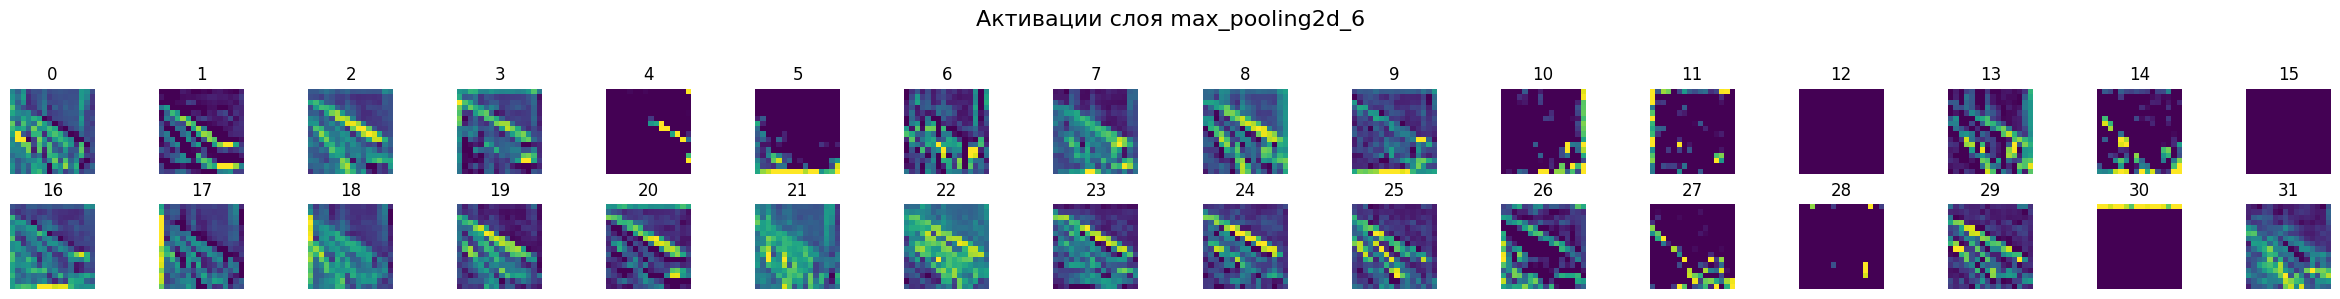

Визуализация слоя: conv2d_10, форма: (1, 14, 14, 64)


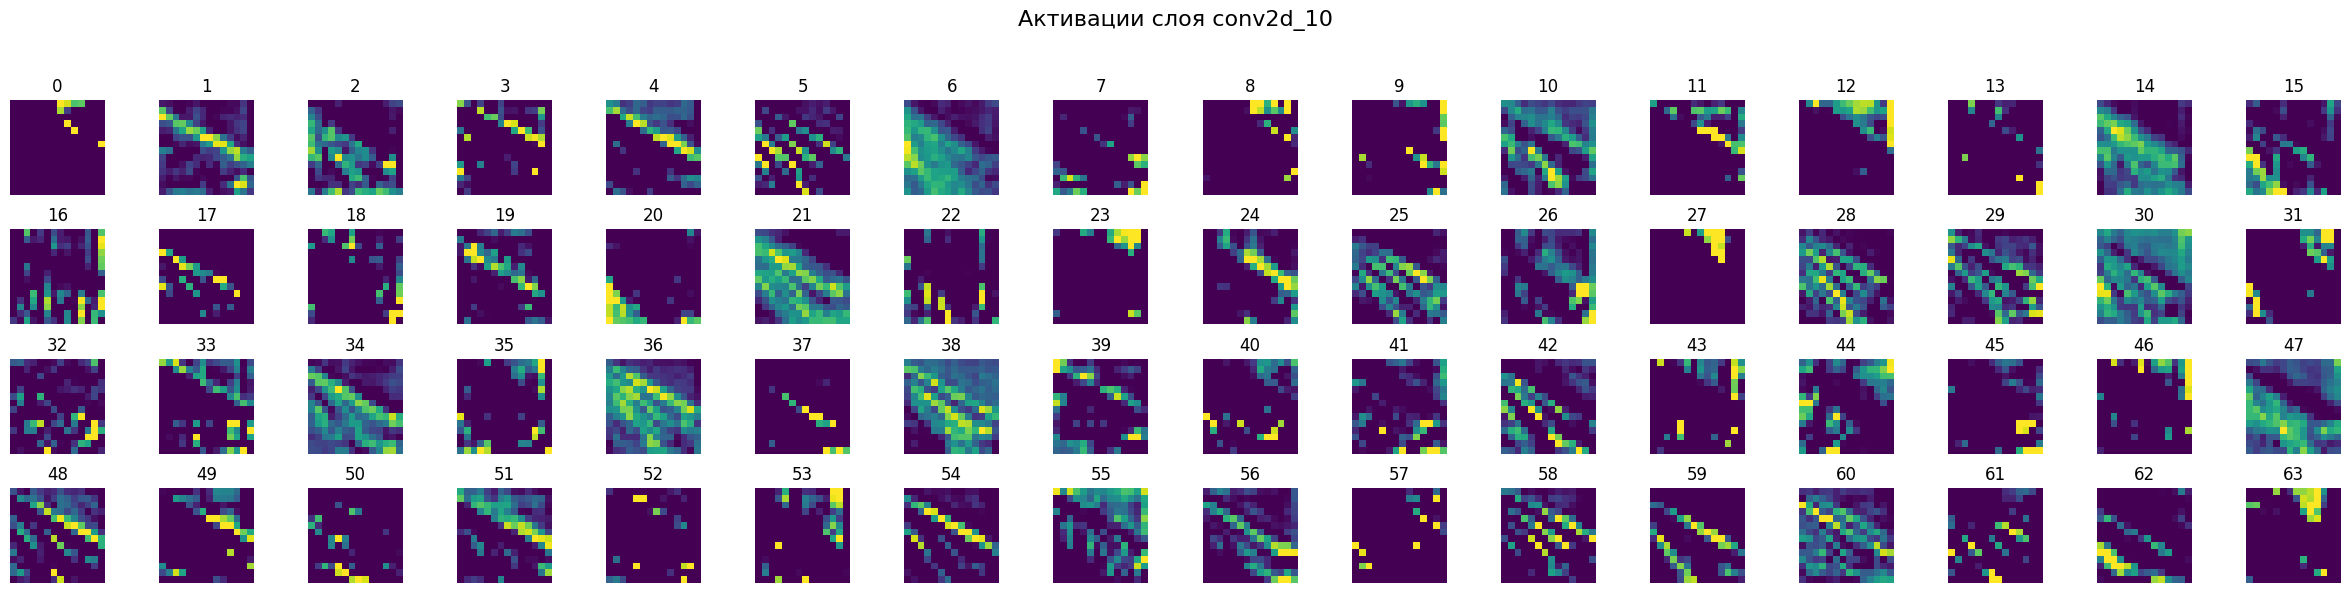

Визуализация слоя: max_pooling2d_7, форма: (1, 7, 7, 64)


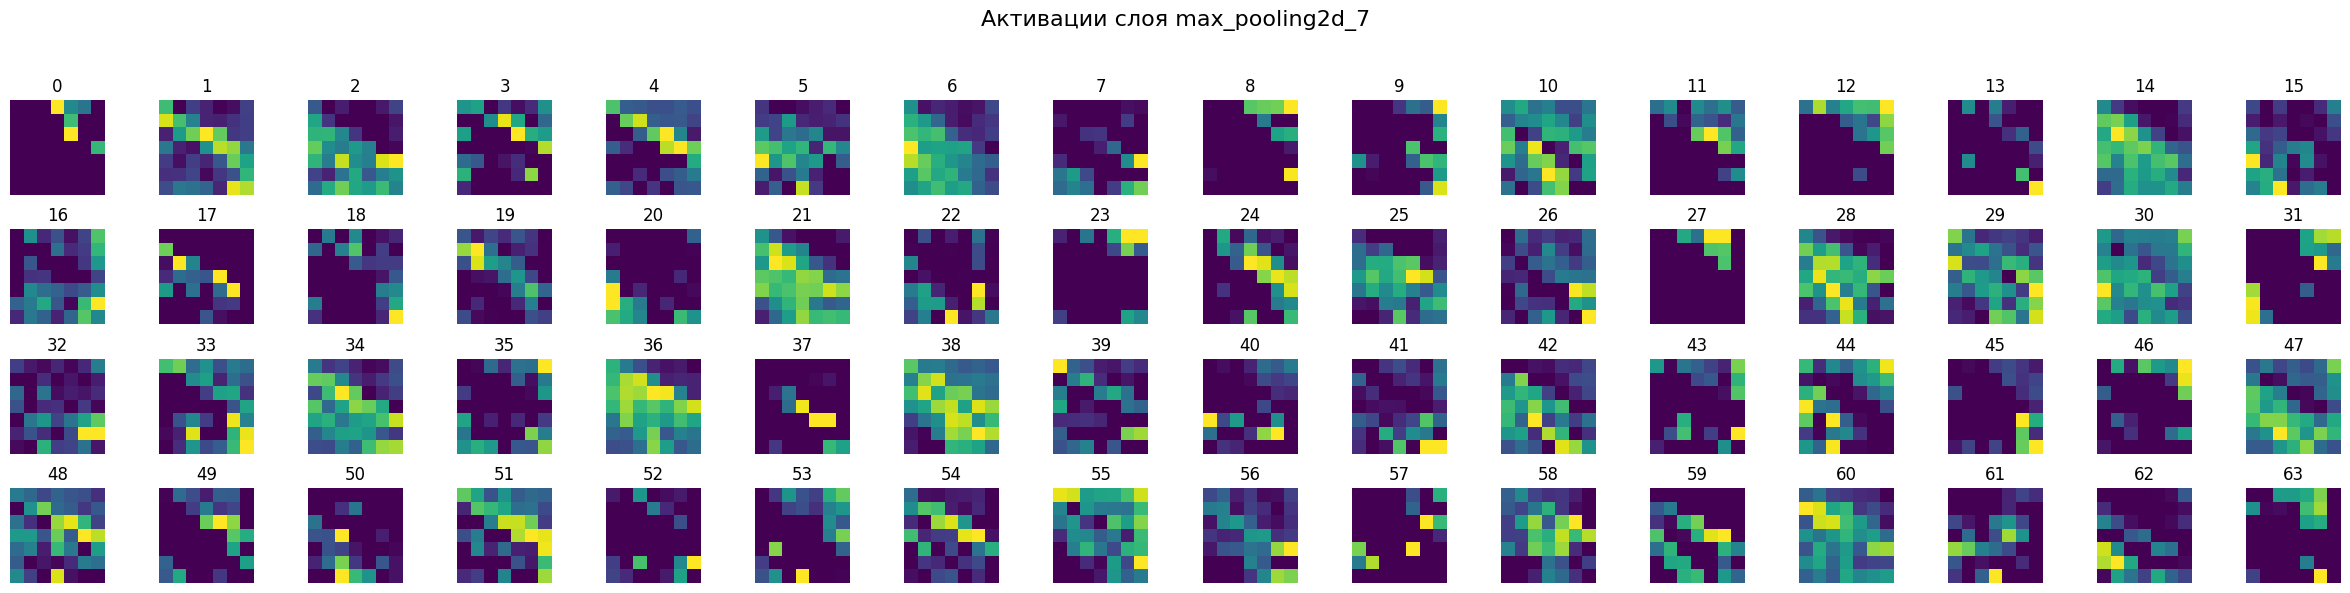

Визуализация слоя: conv2d_11, форма: (1, 7, 7, 128)


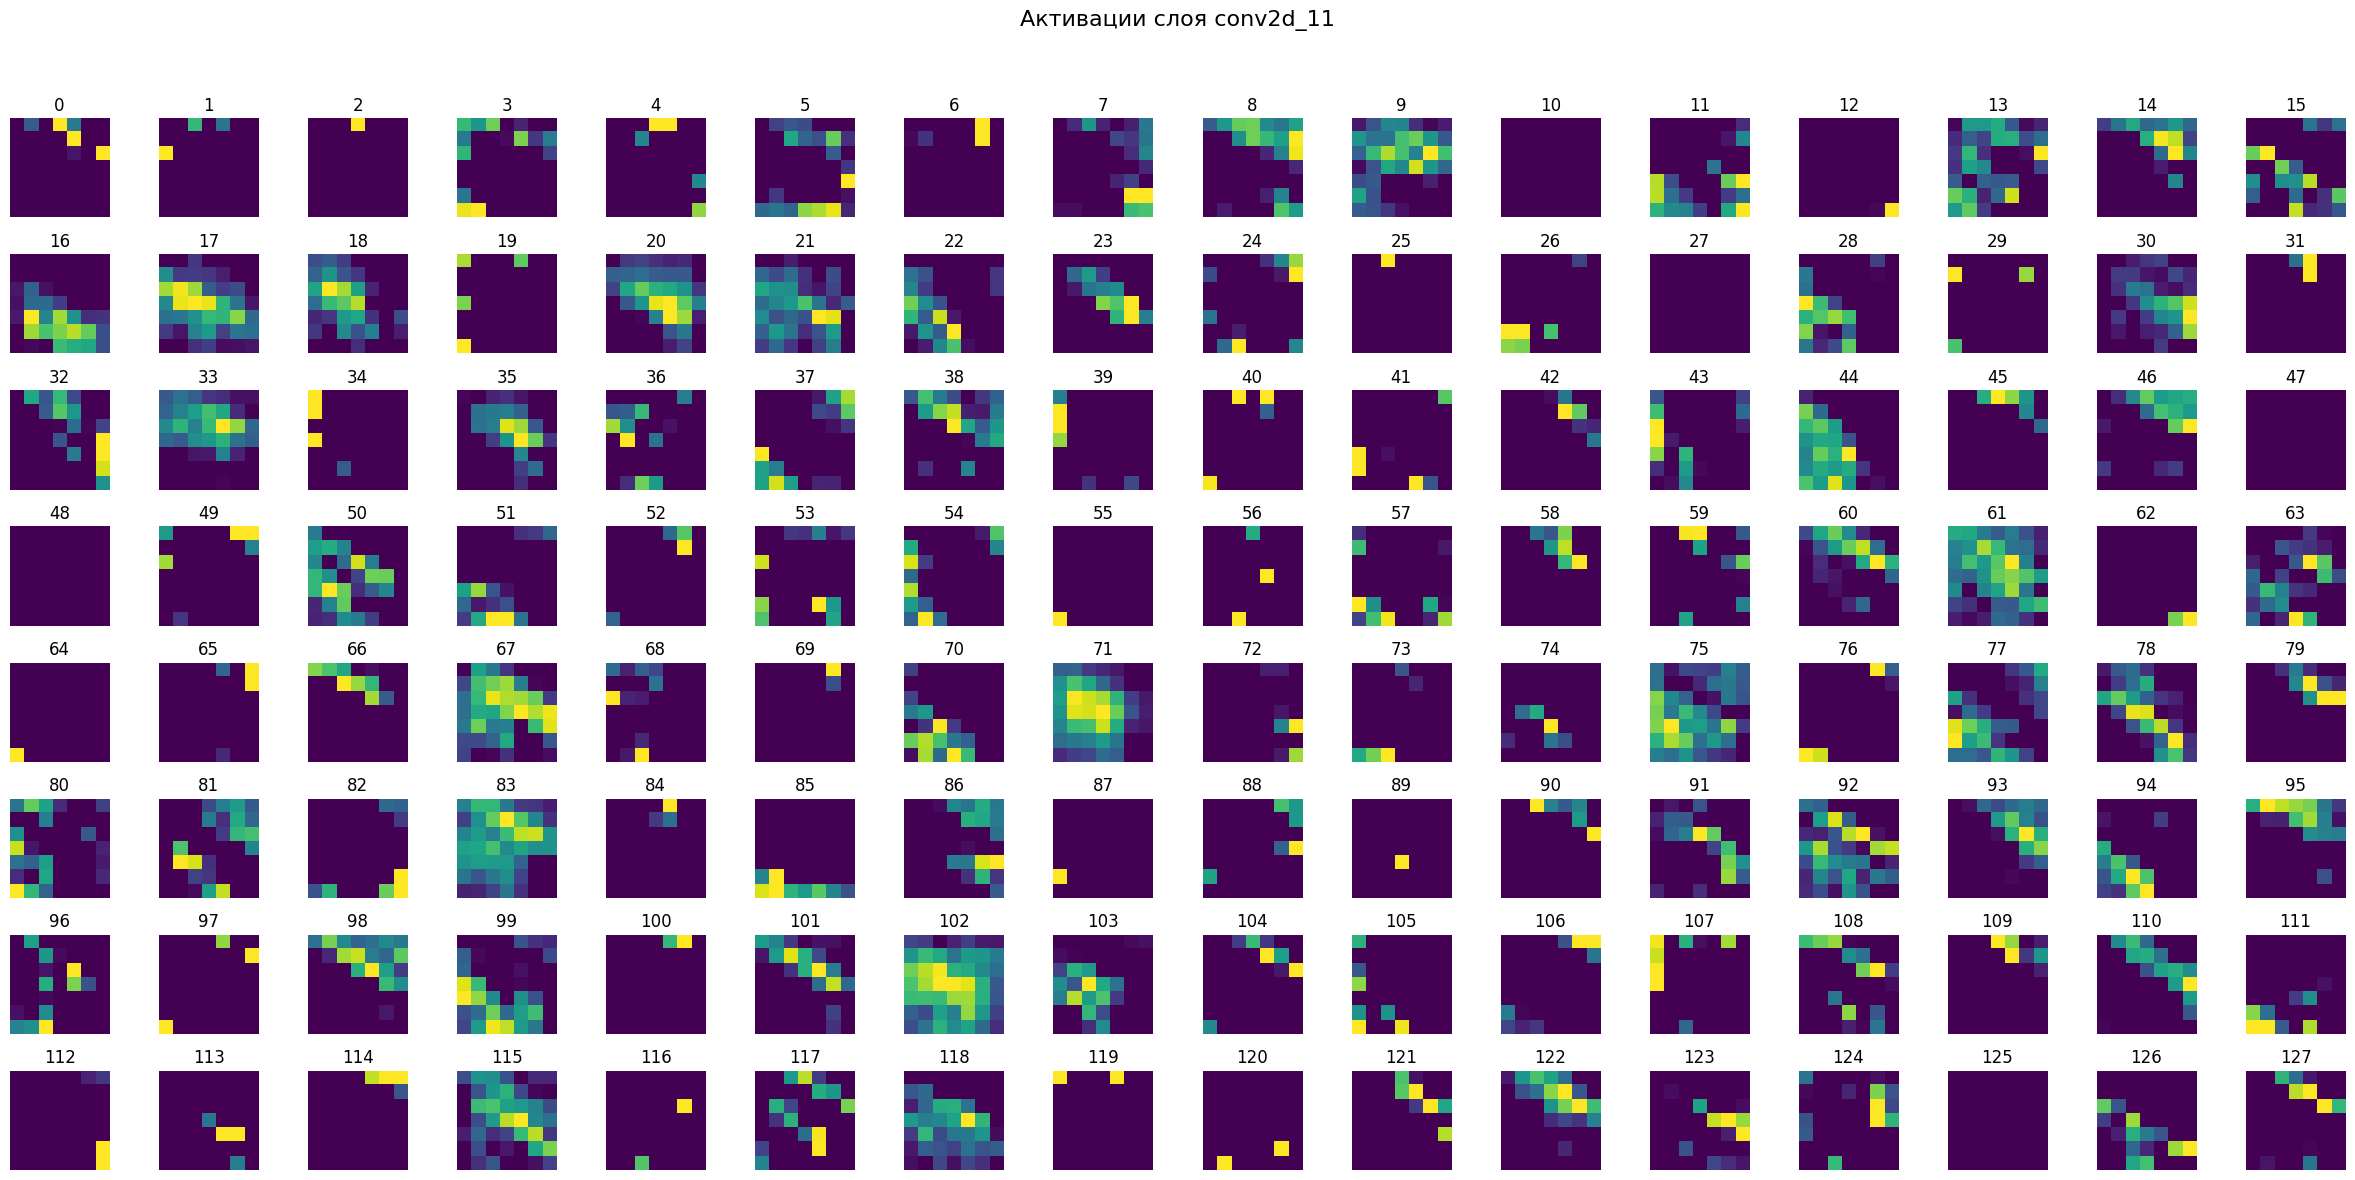

In [31]:
visualize_act_map(model_4, x_train_n[6]) # train

## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [32]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
from keras.models import load_model
from imutils import paths
import random
import pickle
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
imagesPath = sorted(list(paths.list_images('/content/animals/')))
random.shuffle(imagesPath)


In [ ]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# Ваш код #
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="best_model_new.keras", monitor="val_accuracy", save_best_only=True, verbose=0)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Основана на ResNet_like из предыдущей работы
model_new = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.3),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_new.summary()

In [ ]:
model_new.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
def predict_class(image, labels):
  model_1 = load_model('/content/best_model.h5')
  model_2 = load_model('/content/best_model_my.keras')
  model_3 = load_model('/content/best_model_resnet_like.keras')
  model_4 = load_model('/content/best_model_new.keras')

  img_flat = image.flatten()
  img_flat = img_flat.reshape((1, img_flat.shape[0]))
  img = image.reshape(-1, 64, 64, 3)

  preds_1 = model_1.predict(img_flat)
  preds_1 = preds_1[0]
  preds_2 = model_2.predict(img)
  preds_2 = preds_2[0]
  preds_3 = model_3.predict(img)
  preds_3 = preds_3[0]
  preds_4 = model_4.predict(img)
  preds_4 = preds_4[0]
  print('Class\tOld_model\tMy_model\tResNet_like\tNew_model')
  for i in range(len(preds_1)):
    print(f'{labels.classes_[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}\t\t{preds_4[i]:.5f}')
  print(f'Result:\t{preds_1.argmax()}\t\t{preds_2.argmax()}\t\t{preds_3.argmax()}\t\t{preds_4.argmax()}\n')

num = np.random.randint(0, 719, size=20)

for i in range(0, 20):
    image_show = X_test[num[i]]
    plt.plot()
    plt.title(f'Class: {Y_test[num[i]].argmax()}')
    plt.imshow(image_show[:, :, ::-1])
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_class(X_test[num[i]], lb)

In [ ]:
visualize_act_map(model_new, X_train[100]) # train